<a href="https://colab.research.google.com/github/contactewere/Social-Media-Sentiment-Analysis/blob/main/Social_Media_Sentiment_Analysis_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In recent times social media has served as an informal means for acquiring direct feedback from end users for most organisations. This can be used to assess the unfiltered perception of consumers regarding products or services. The feedback received from social media platforms could range from zero to millions of comments (Rupin 2023). These comments could be either positive, negative, neutral, or unrelated to the subject matter. Analysing the posts with a high volume of comments manually could lead to bias and will also be labour-intensive. By utilising Machine Learning Algorithms, practical models can be built to analyse social media comments regarding a product or service and classify them in a manner that will aid stakeholders in making informed decisions.
In this project, the Twitter US Airline sentiment dataset was analysed for information extraction using data visualisation and analytics techniques. Thereafter, the performance of four different Machine Learning Algorithms were assessed in performing sentiment classification based on different Data split ratios, Feature engineering, and Random Minority Oversampling technique.


# Installing Packages

In [ ]:
pip install neattext contractions demoji imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 15.6 MB/s eta 0:00:00


**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import seaborn as sns
import re
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import ComplementNB
cnb = ComplementNB()
from sklearn.svm import SVC
svm = SVC(kernel='linear', random_state = 10)
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
Rf = RandomForestClassifier()
from sklearn.model_selection import KFold
from mlxtend.plotting import plot_confusion_matrix
nltk.download('words')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import demoji
import neattext as nt
import neattext.functions as nf
import contractions
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class = 'multinomial')
from mlxtend.plotting import plot_confusion_matrix
import os
import time

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


**Dataset Upload**

In [ ]:
Tweets = pd.read_csv('Tweets.csv')
Tweets.head(6)

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  5.700000e+17           neutral                        1.0000   
1  5.700000e+17          positive                        0.3486   
2  5.700000e+17           neutral                        0.6837   
3  5.700000e+17          negative                        1.0000   
4  5.700000e+17          negative                        1.0000   
5  5.700000e+17          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   
5     Can't Tell                     0.6842  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   
5                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   
5  @VirginAmerica seriously would pay $30 a fligh...         NaN   

      tweet_created tweet_location               user_timezone  
0  24/02/2015 11:35            NaN  Eastern Time (US & Canada)  
1  24/02/2015 11:15            NaN  Pacific Time (US & Canada)  
2  24/02/2015 11:15      Lets Play  Central Time (US & Canada)  
3  24/02/2015 11:15            NaN  Pacific Time (US & Canada)  
4  24/02/2015 11:14            NaN  Pacific Time (US & Canada)  
5  24/02/2015 11:14            NaN  Pacific Time (US & Canada)

**Data Split into Train(60%) and Test(40%) Sets**

In [ ]:
Tweets_train, Tweets_test = train_test_split(Tweets, test_size = 0.40, random_state = 26)

**Dataset Information for the Training Data**

In [ ]:
Tweets_train.shape

(8784, 15)

In [ ]:
Tweets_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8784 entries, 13807 to 4917
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      8784 non-null   float64
 1   airline_sentiment             8784 non-null   object 
 2   airline_sentiment_confidence  8784 non-null   float64
 3   negativereason                5545 non-null   object 
 4   negativereason_confidence     6343 non-null   float64
 5   airline                       8784 non-null   object 
 6   airline_sentiment_gold        24 non-null     object 
 7   name                          8784 non-null   object 
 8   negativereason_gold           17 non-null     object 
 9   retweet_count                 8784 non-null   int64  
 10  text                          8784 non-null   object 
 11  tweet_coord                   631 non-null    object 
 12  tweet_created                 8784 non-null   object 
 13 

**Dropping Duplicates in the Dataset**

In [ ]:
duplicates = Tweets_train.duplicated()
duplicate_rows = Tweets_train[Tweets_train.duplicated()]
duplicate_rows.shape

(15, 15)

In [ ]:
duplicate_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 11917 to 11907
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      15 non-null     float64
 1   airline_sentiment             15 non-null     object 
 2   airline_sentiment_confidence  15 non-null     float64
 3   negativereason                8 non-null      object 
 4   negativereason_confidence     8 non-null      float64
 5   airline                       15 non-null     object 
 6   airline_sentiment_gold        0 non-null      object 
 7   name                          15 non-null     object 
 8   negativereason_gold           0 non-null      object 
 9   retweet_count                 15 non-null     int64  
 10  text                          15 non-null     object 
 11  tweet_coord                   1 non-null      object 
 12  tweet_created                 15 non-null     object 
 13  

In [ ]:
Tweets_train = Tweets_train.drop_duplicates()
Tweets_train.shape

(8769, 15)

**Handling Missing Values in the Training Dataset**

In [ ]:
Tweets_train.isnull().sum().sort_values(ascending = False)

negativereason_gold             8752
airline_sentiment_gold          8745
tweet_coord                     8139
negativereason                  3232
user_timezone                   2906
tweet_location                  2786
negativereason_confidence       2434
tweet_id                           0
airline_sentiment                  0
airline_sentiment_confidence       0
airline                            0
name                               0
retweet_count                      0
text                               0
tweet_created                      0
dtype: int64

**Dropping Features with Over 60% Missing Data**

In [ ]:
print('Percentage null or na values in the dataset')
((Tweets_train.isnull()|Tweets_train.isna()).sum()*100/Tweets_train.index.size).round(2)

Percentage null or na values in the dataset


tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  36.86
negativereason_confidence       27.76
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.81
retweet_count                    0.00
text                             0.00
tweet_coord                     92.82
tweet_created                    0.00
tweet_location                  31.77
user_timezone                   33.14
dtype: float64

In [ ]:
Tweets_train = Tweets_train.drop(columns =['tweet_coord','airline_sentiment_gold', 'negativereason_gold'], axis = 1)

**Defining a Function to Perform Text Pre-processing**

In [ ]:
def cleaner(msg):
  demoji.download_codes()
  msg = contractions.fix(msg)           #Contraction Expansion
  msg = demoji.replace_with_desc(msg)   #Converting Emojis to text
  msg = nf.remove_userhandles(msg)      #Removal of user handles
  msg = nf.remove_html_tags(msg)        #Removal of HTML tags
  msg = nf.remove_hashtags(msg)         #Removal of hashtags
  msg = nf.clean_text(text = msg, puncts = True, urls = True, emails = True, numbers = True, special_char = True, non_ascii = True, multiple_whitespaces =True, currency_symbols = True)
  msg = ' '.join(word for word in msg.split() if len(word) > 2)    # removal of words with less than 3 characters
  msg = [lemmatizer.lemmatize(word) for word in msg.split()]       #Lemmatization
  return (" ".join(msg))

**Text Cleaning**

In [ ]:
Tweets_train['clean_tweets'] = Tweets_train['text'].apply(cleaner)

<ipython-input-13-1ade4e6ee48c>:2: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


In [ ]:
Tweets_train.tail(4)

tweet_id airline_sentiment  airline_sentiment_confidence  \
9648   5.700000e+17          negative                        1.0000   
5894   5.690000e+17          positive                        1.0000   
13630  5.700000e+17          negative                        0.6536   
4917   5.700000e+17          negative                        1.0000   

               negativereason  negativereason_confidence     airline  \
9648               Can't Tell                     0.3748  US Airways   
5894                      NaN                        NaN   Southwest   
13630  Customer Service Issue                     0.6536    American   
4917               Can't Tell                     0.6714   Southwest   

                 name  retweet_count  \
9648         rossj987              0   
5894        MCarlucci              0   
13630      seamswrite              0   
4917   CheyHoProblems              0   

                                                    text     tweet_created  \
9648   @USAirways But nope!  Apparently this is the w...  22/02/2015 23:19   
5894   @SouthwestAir thanks for the b day concert I w...  19/02/2015 12:21   
13630  @AmericanAir How best to talk with an agent to...  23/02/2015 01:17   
4917   @SouthwestAir I'm gonna ignore the fasten seat...  22/02/2015 16:07   

         tweet_location                user_timezone  \
9648   Washington, D.C.   Eastern Time (US & Canada)   
5894                SEA   Pacific Time (US & Canada)   
13630               NaN                          NaN   
4917                NaN  Mountain Time (US & Canada)   

                                            clean_tweets  
9648   nope apparently way guy business guess flying ...  
5894   thanks day concert watched and noticed fist bu...  
13630  best talk agent reschedule cancelled flighted ...  
4917          going ignore fasten seatbelt sign want man

**Dataset Visualization**

In [ ]:
Tweets_train.airline_sentiment.value_counts()

negative    5537
neutral     1833
positive    1399
Name: airline_sentiment, dtype: int64

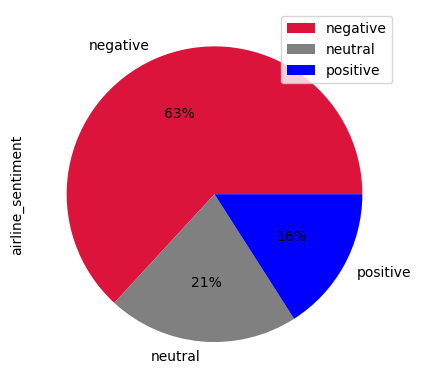

In [ ]:
Tweets_train.airline_sentiment.value_counts().plot(kind = 'pie', autopct = '%1.0f%%', colors =['crimson', 'grey', 'blue'])
plt.legend()

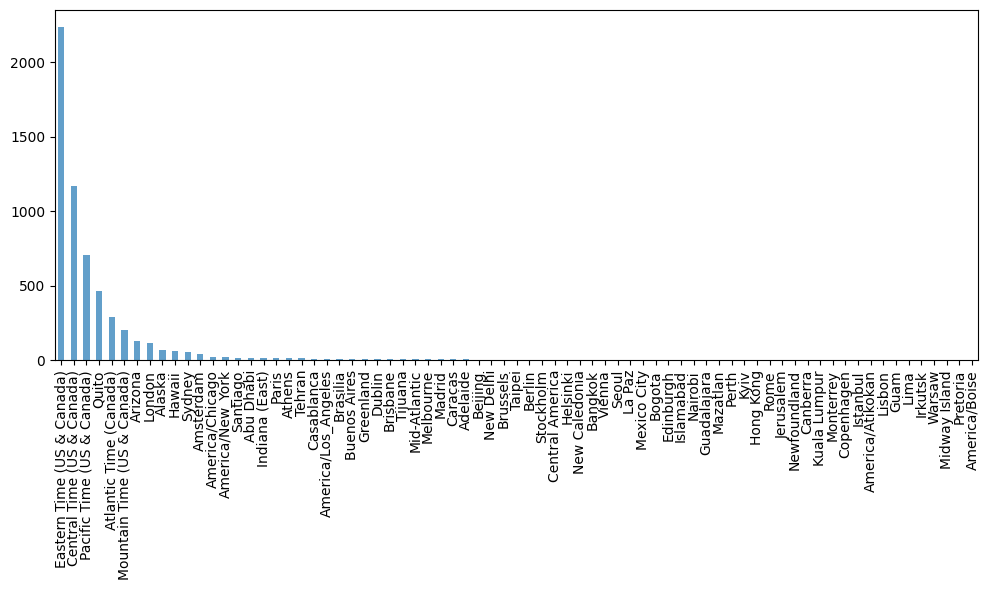

In [ ]:
location = Tweets_train['user_timezone'].value_counts()
plt.figure(figsize =(10,6))
location.plot(kind = 'bar',alpha = 0.7)
plt.tight_layout()

In [ ]:
Tweets_train['date'] = pd.to_datetime(Tweets_train['tweet_created']).dt.date

<ipython-input-20-49546f8a6019>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='date', data = Tweets_train, palette='viridis')


<Figure size 1200x600 with 0 Axes>

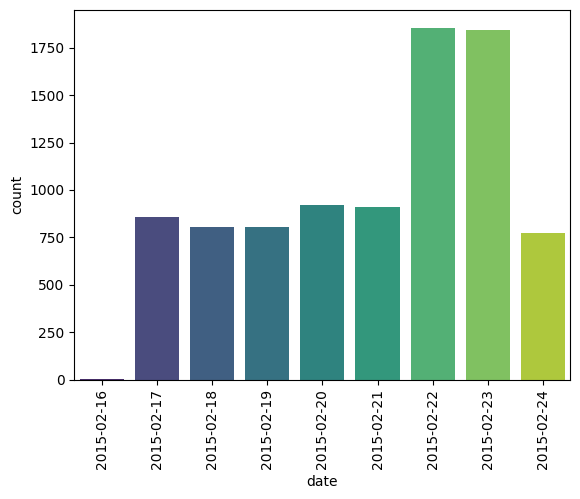

<Figure size 1200x600 with 0 Axes>

In [ ]:
Tweets_train = Tweets_train.sort_values('date')
sns.countplot(x='date', data = Tweets_train, palette='viridis')
plt.xticks(rotation = 90)
plt.figure(figsize = (12, 6))

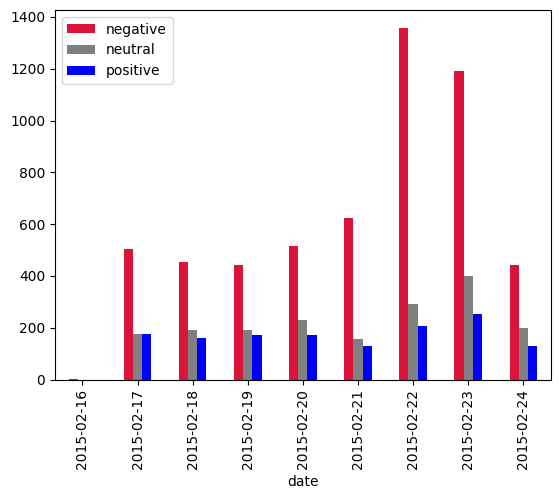

In [ ]:
df1 = Tweets_train.groupby(['date', 'airline_sentiment']).airline_sentiment.count().unstack()
df1.plot(kind = 'bar', color = ['crimson', 'grey', 'blue'] )
plt.legend()

<ipython-input-22-5ce87f67d723>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='negativereason', data = Tweets_train, palette='Accent')


(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.]),
 [Text(0.0, 0, '0'),
  Text(250.0, 0, '250'),
  Text(500.0, 0, '500'),
  Text(750.0, 0, '750'),
  Text(1000.0, 0, '1000'),
  Text(1250.0, 0, '1250'),
  Text(1500.0, 0, '1500'),
  Text(1750.0, 0, '1750'),
  Text(2000.0, 0, '2000')])

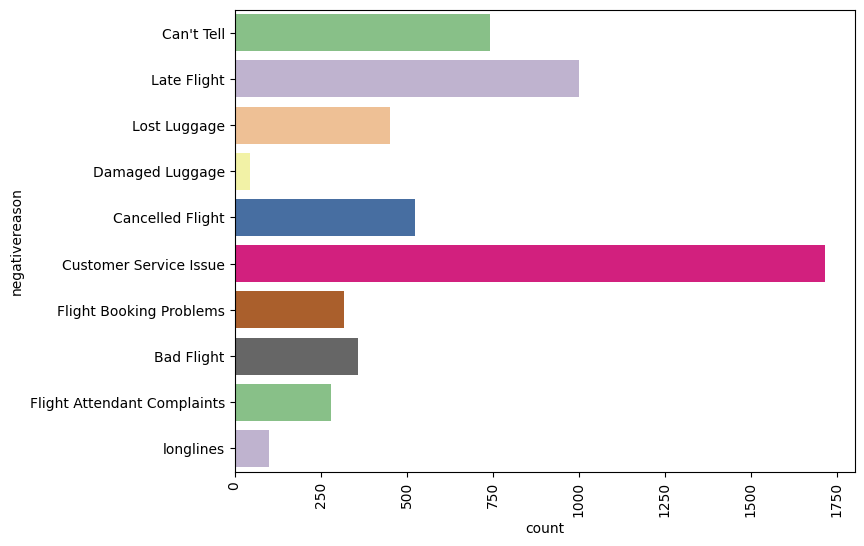

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(y='negativereason', data = Tweets_train, palette='Accent')
plt.xticks(rotation = 90)


Text(0.5, 1.0, 'Negative Reason Chart by Date')

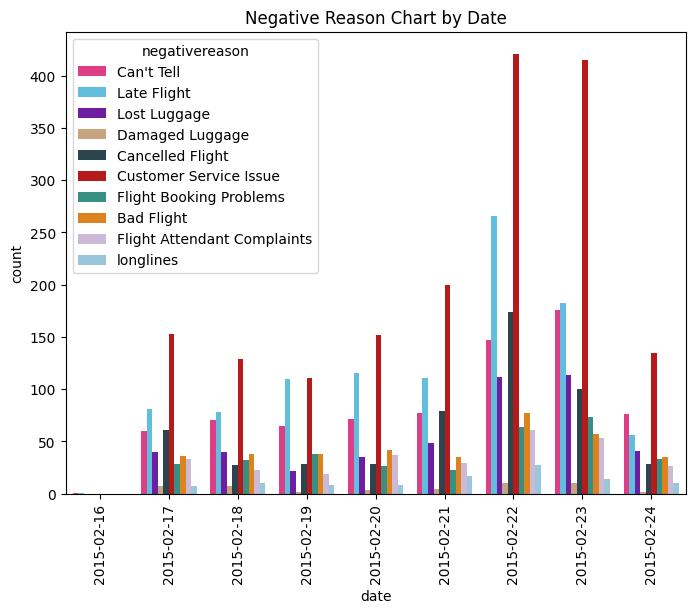

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='date',hue='negativereason', data = Tweets_train, palette=["#F72585","#4CC9F0","#7209B7","#D4A373","#264653","#D00000","#2A9D8F","#FB8500","#CDB4DB","#8ECAE6"])
plt.xticks(rotation = 90)
plt.title("Negative Reason Chart by Date")

Text(0.5, 1.0, 'Wordcloud Before Text Pre-processing')

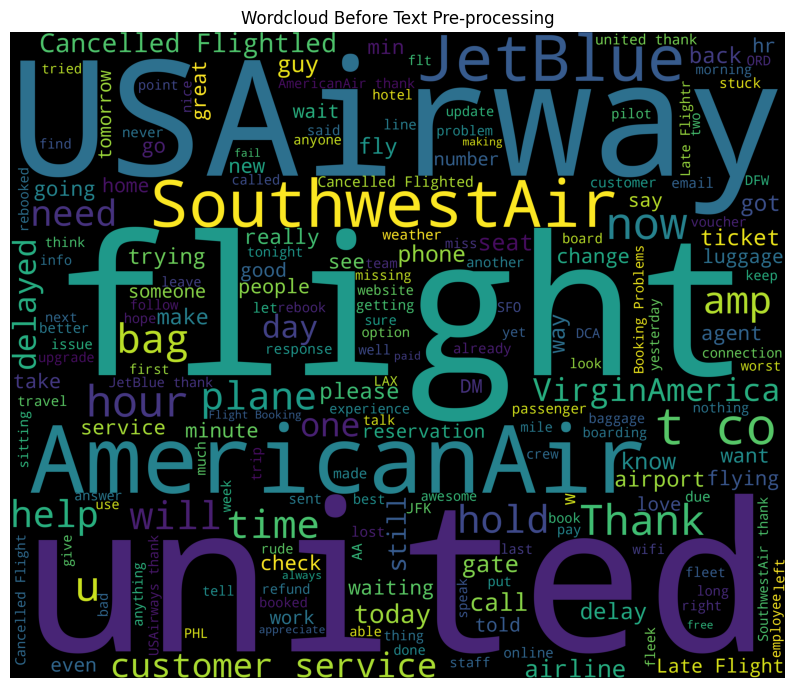

In [ ]:
words_df =Tweets_train['text']
words = ' '.join(words_df)
wordcloud = WordCloud(width=3000, height=2500, background_color='black').generate(words)
plt.figure(figsize=(10, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Wordcloud Before Text Pre-processing')

Text(0.5, 1.0, 'Wordcloud After Text Pre-processing')

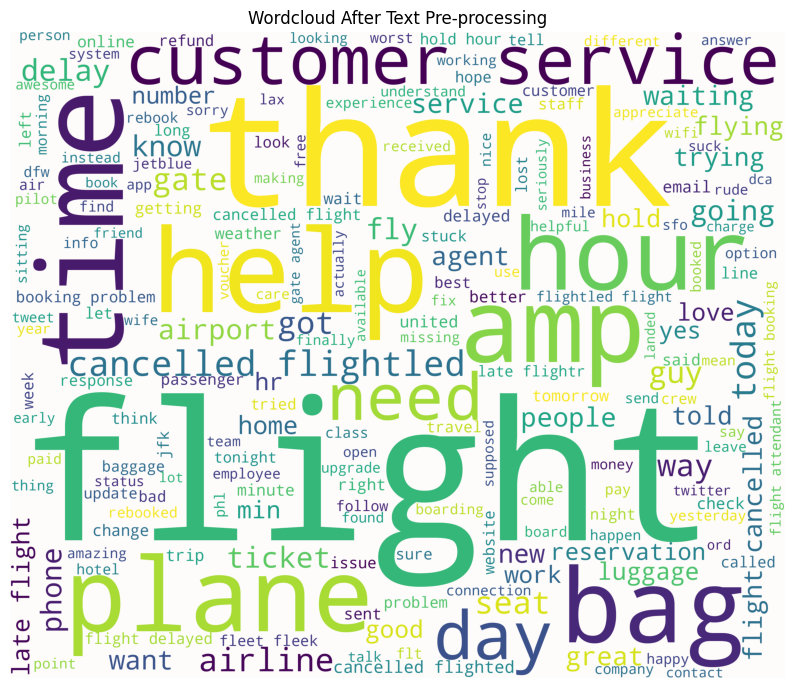

In [ ]:
words_df =Tweets_train['clean_tweets']
words = ' '.join(words_df)
wordcloud = WordCloud(width=3000, height=2500, background_color='#FEFCFB').generate(words)
plt.figure(figsize=(10, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Wordcloud After Text Pre-processing')

Text(0.5, 1.0, 'Wordcloud of Negative Tweets')

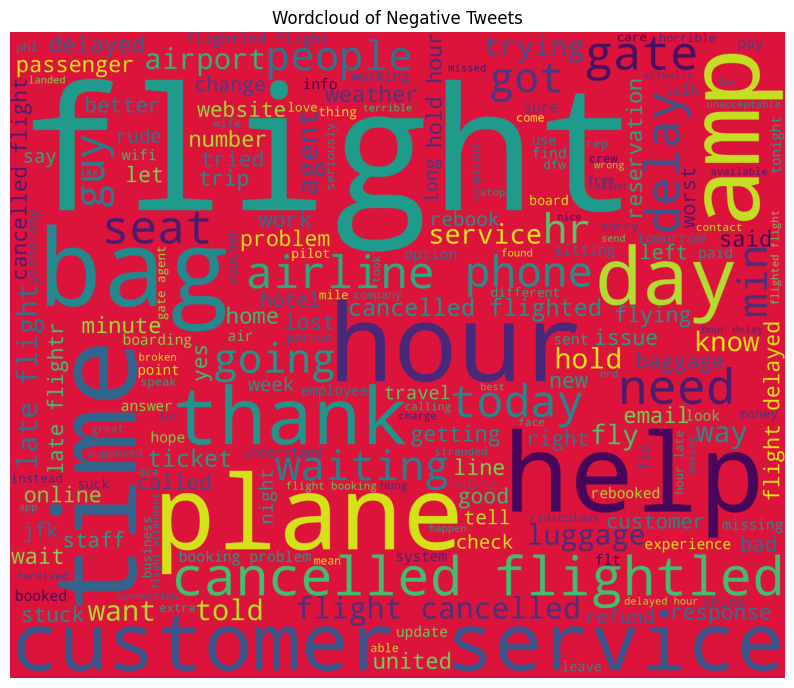

In [ ]:
neg_df=Tweets_train[Tweets_train['airline_sentiment']=='negative']
words = ' '.join(neg_df['clean_tweets'])
wordcloud = WordCloud(width=3000, height=2500, background_color='crimson').generate(words)
plt.figure(figsize=(10, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Wordcloud of Negative Tweets')

Text(0.5, 1.0, 'Wordcloud of Positive Tweets')

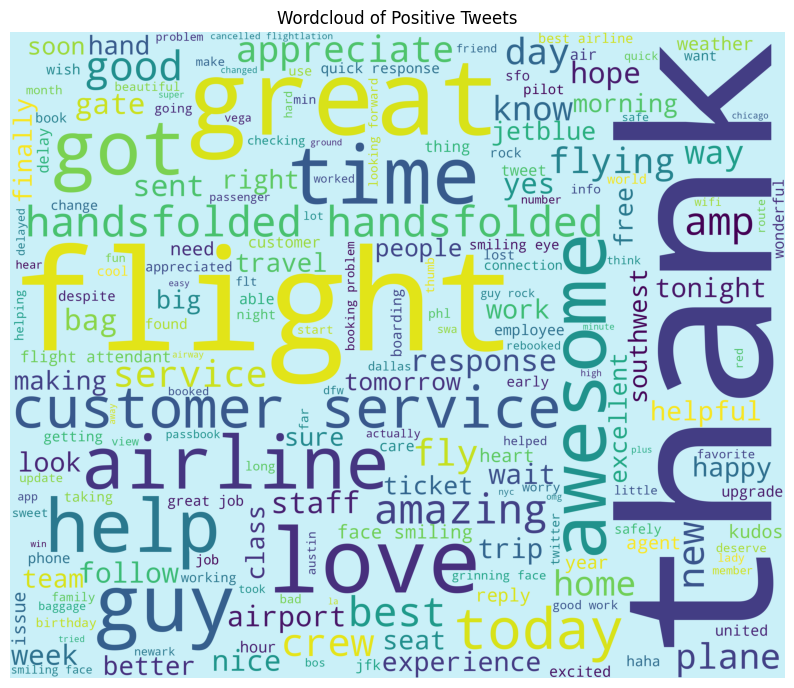

In [ ]:
pos_df=Tweets_train[Tweets_train['airline_sentiment']=='positive']
words = ' '.join(pos_df['clean_tweets'])
wordcloud = WordCloud(width=3000, height=2500, background_color='#CAF0F8').generate(words)
plt.figure(figsize=(10, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Wordcloud of Positive Tweets')

(-0.5, 2999.5, 2499.5, -0.5)

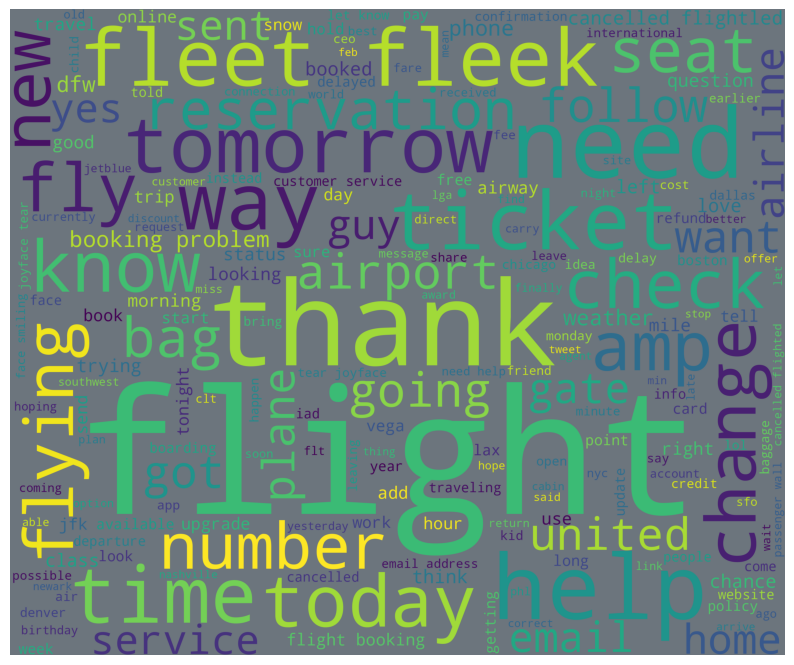

In [ ]:
neu_df=Tweets_train[Tweets_train['airline_sentiment']=='neutral']
words = ' '.join(neu_df['clean_tweets'])
wordcloud = WordCloud(width=3000, height=2500, background_color='#6C757D').generate(words)
plt.figure(figsize=(10, 12))
plt.imshow(wordcloud)
plt.axis('off')

**Feature Selection**

In [ ]:
selected_features = ['airline_sentiment', 'clean_tweets'] #Features selected to build the models
Tweets_train = Tweets_train[selected_features]
Tweets_train.tail(5)

airline_sentiment                                       clean_tweets
659            negative                           able confirmation number
4488            neutral                         flight rude httptcorlpjchb
9133           negative                   spent hour got entire experience
12480           neutral  flight prepares flight departing httptcoxbkvcr...
4419           negative  swa help hotel industry book flight day need s...

**Data Vectorization**

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=3000, min_df=7, max_df = 0.8, analyzer ='word')
tfidf_vect = tfidf_vectorizer.fit(Tweets_train['clean_tweets'])
X_tfidf = tfidf_vect.transform(Tweets_train['clean_tweets'])
feature_names = tfidf_vectorizer.get_feature_names_out()
X_train = pd.DataFrame(X_tfidf.toarray(), columns=feature_names)

In [ ]:
x_train = X_train
y_train = Tweets_train['airline_sentiment']

**Fitting the Models on the Training Data**

**Complement Naive Bayes Model**

[[4599  546  392]
 [ 476 1081  276]
 [ 145   96 1158]]
              precision    recall  f1-score   support

    negative       0.88      0.83      0.86      5537
     neutral       0.63      0.59      0.61      1833
    positive       0.63      0.83      0.72      1399

    accuracy                           0.78      8769
   macro avg       0.71      0.75      0.73      8769
weighted avg       0.79      0.78      0.78      8769



([<matplotlib.axis.YTick at 0x79e7230bfca0>,
 [Text(0, 0, 'Negative'), Text(0, 1, 'Neutral'), Text(0, 2, 'Positive')])

<Figure size 640x480 with 0 Axes>

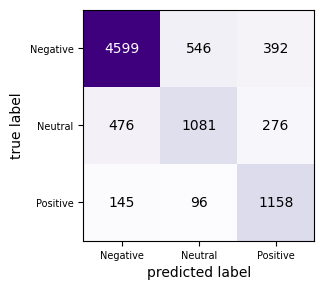

In [ ]:
cnb.fit(x_train, y_train)
predictions = cnb.predict(x_train)
print(confusion_matrix(y_train, predictions))
print(classification_report(y_train, predictions))
cm=confusion_matrix(y_train, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(3,3), hide_ticks=True, cmap = 'Purples')
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=7,color='black')
plt.yticks(range(3), ['Negative','Neutral', 'Positive'], fontsize=7)

**Random Forest Model**

[[5463   69    5]
 [  17 1785   31]
 [   6   39 1354]]
              precision    recall  f1-score   support

    negative       1.00      0.99      0.99      5537
     neutral       0.94      0.97      0.96      1833
    positive       0.97      0.97      0.97      1399

    accuracy                           0.98      8769
   macro avg       0.97      0.98      0.97      8769
weighted avg       0.98      0.98      0.98      8769



([<matplotlib.axis.YTick at 0x79e7235e8e50>,
 [Text(0, 0, 'Negative'), Text(0, 1, 'Neutral'), Text(0, 2, 'Positive')])

<Figure size 640x480 with 0 Axes>

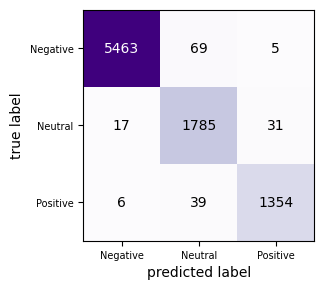

In [ ]:
Rf.fit(x_train, y_train)
predictions = Rf.predict(x_train)
print(confusion_matrix(y_train, predictions))
print(classification_report(y_train, predictions))
cm=confusion_matrix(y_train, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(3,3), hide_ticks=True, cmap = 'Purples')
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=7,color='black')
plt.yticks(range(3), ['Negative','Neutral', 'Positive'], fontsize=7)

**Logistic Regression Model**

[[5249  215   73]
 [ 709 1020  104]
 [ 346  123  930]]
              precision    recall  f1-score   support

    negative       0.83      0.95      0.89      5537
     neutral       0.75      0.56      0.64      1833
    positive       0.84      0.66      0.74      1399

    accuracy                           0.82      8769
   macro avg       0.81      0.72      0.76      8769
weighted avg       0.82      0.82      0.81      8769



([<matplotlib.axis.YTick at 0x79e72359a2c0>,
 [Text(0, 0, 'Negative'), Text(0, 1, 'Neutral'), Text(0, 2, 'Positive')])

<Figure size 640x480 with 0 Axes>

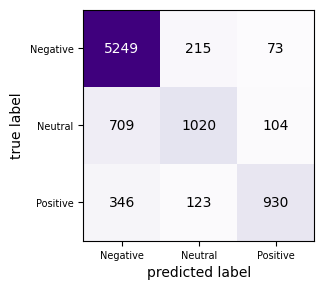

In [ ]:
lr.fit(x_train, y_train)
predictions = lr.predict(x_train)
print(confusion_matrix(y_train, predictions))
print(classification_report(y_train, predictions))
cm=confusion_matrix(y_train, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(3,3), hide_ticks=True, cmap = 'Purples')
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=7,color='black')
plt.yticks(range(3), ['Negative','Neutral', 'Positive'], fontsize=7)

**SVM Model**

[[5251  203   83]
 [ 722 1009  102]
 [ 310  101  988]]
              precision    recall  f1-score   support

    negative       0.84      0.95      0.89      5537
     neutral       0.77      0.55      0.64      1833
    positive       0.84      0.71      0.77      1399

    accuracy                           0.83      8769
   macro avg       0.82      0.74      0.77      8769
weighted avg       0.82      0.83      0.82      8769



([<matplotlib.axis.YTick at 0x79e72236be80>,
 [Text(0, 0, 'Negative'), Text(0, 1, 'Neutral'), Text(0, 2, 'Positive')])

<Figure size 640x480 with 0 Axes>

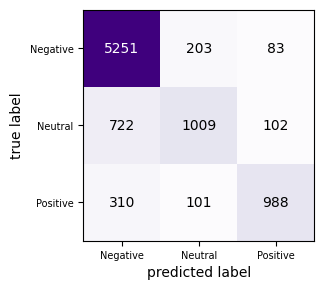

In [ ]:
svm.fit(x_train, y_train)
predictions = svm.predict(x_train)
print(confusion_matrix(y_train, predictions))
print(classification_report(y_train, predictions))
cm=confusion_matrix(y_train, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(3,3), hide_ticks=True, cmap = 'Purples')
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=7,color='black')
plt.yticks(range(3), ['Negative','Neutral', 'Positive'], fontsize=7)

**Test Dataset Pre-processing**

In [ ]:
Tweets_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5856 entries, 11637 to 5599
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      5856 non-null   float64
 1   airline_sentiment             5856 non-null   object 
 2   airline_sentiment_confidence  5856 non-null   float64
 3   negativereason                3633 non-null   object 
 4   negativereason_confidence     4179 non-null   float64
 5   airline                       5856 non-null   object 
 6   airline_sentiment_gold        16 non-null     object 
 7   name                          5856 non-null   object 
 8   negativereason_gold           15 non-null     object 
 9   retweet_count                 5856 non-null   int64  
 10  text                          5856 non-null   object 
 11  tweet_coord                   388 non-null    object 
 12  tweet_created                 5856 non-null   object 
 13 

**Handling Duplicates**

In [ ]:
duplicatest = Tweets_test.duplicated()
duplicate_rowst = Tweets_test[Tweets_test.duplicated()]
duplicate_rowst.shape

(7, 15)

In [ ]:
duplicate_rowst.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
11981  5.700000e+17          negative                           1.0   
12159  5.700000e+17          positive                           1.0   
12079  5.700000e+17          negative                           1.0   
11948  5.700000e+17          negative                           1.0   
11959  5.700000e+17           neutral                           1.0   

                    negativereason  negativereason_confidence   airline  \
11981  Flight Attendant Complaints                        1.0  American   
12159                          NaN                        NaN  American   
12079                  Late Flight                        1.0  American   
11948                 Lost Luggage                        1.0  American   
11959                          NaN                        NaN  American   

      airline_sentiment_gold             name negativereason_gold  \
11981                    NaN   StefanNiemczyk                 NaN   
12159                    NaN         ESPartee                 NaN   
12079                    NaN      djjohnpayne                 NaN   
11948                    NaN  jacquelinewins6                 NaN   
11959                    NaN     pbpinftworth                 NaN   

       retweet_count                                               text  \
11981              0  @AmericanAir but, what I can always rely on wh...   
12159              0  @americanair new plane, #gogo, easy power for ...   
12079              0  @AmericanAir if by near the gate you mean sitt...   
11948              0  @AmericanAir That's ok...You may keep my $25 a...   
11959              0  @americanair Yes to the iOS. I'm running iOS 8...   

      tweet_coord     tweet_created  tweet_location  \
11981         NaN  24/02/2015 09:37             NaN   
12159  [0.0, 0.0]  24/02/2015 09:23  alexandria, va   
12079  [0.0, 0.0]  24/02/2015 11:05   Las Vegas, NV   
11948         NaN  24/02/2015 10:22             NaN   
11959         NaN  24/02/2015 10:05         DFW, TX   

                    user_timezone  
11981                     Arizona  
12159  Eastern Time (US & Canada)  
12079  Pacific Time (US & Canada)  
11948                         NaN  
11959  Central Time (US & Canada)

In [ ]:
Tweets_test = Tweets_test.drop_duplicates()

**Feature Selection**

In [ ]:
select_features = ['airline_sentiment', 'text']
Tweets_test = Tweets_test[select_features]
Tweets_test.head(4)

airline_sentiment                                               text
11637          negative  @USAirways flights keep getting delayed and Ca...
6096           positive  @SouthwestAir - Great flight from Phoenix to D...
2370            neutral  @united I haven't booked yet, I'm asking befor...
13300           neutral  @AmericanAir its only 1500 characters, i will ...

Text **Cleaning**

In [ ]:
Tweets_test['clean_tweets']= Tweets_test['text'].apply(cleaner)

<ipython-input-13-1ade4e6ee48c>:2: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


In [ ]:
Tweets_test.head(3)

airline_sentiment                                               text  \
11637          negative  @USAirways flights keep getting delayed and Ca...   
6096           positive  @SouthwestAir - Great flight from Phoenix to D...   
2370            neutral  @united I haven't booked yet, I'm asking befor...   

                                            clean_tweets  
11637  flight getting delayed cancelled flighted info...  
6096   great flight phoenix dallas tonightgreat servi...  
2370                                  booked asking book

In [ ]:
x_test = Tweets_test['clean_tweets']
y_test = Tweets_test['airline_sentiment']

**Models' Performance on Test Data**

**Complement Naive Bayes Model**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ComplementNB was fitted with feature names
  warnings.warn(


[[2937  411  282]
 [ 413  634  213]
 [ 134   89  736]]
              precision    recall  f1-score   support

    negative       0.84      0.81      0.83      3630
     neutral       0.56      0.50      0.53      1260
    positive       0.60      0.77      0.67       959

    accuracy                           0.74      5849
   macro avg       0.67      0.69      0.68      5849
weighted avg       0.74      0.74      0.74      5849



Text(0.5, 1.0, 'Confusion Matrix for 60-40 Split')

<Figure size 640x480 with 0 Axes>

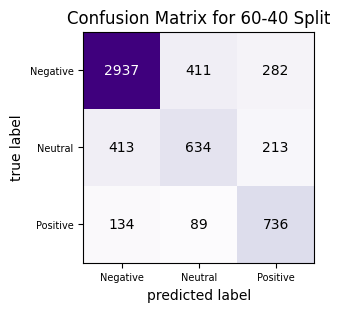

In [ ]:
predictions = cnb.predict(tfidf_vect.transform(x_test).toarray())
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
cm=confusion_matrix(y_test, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(3,3), hide_ticks=True, cmap = 'Purples')
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=7,color='black')
plt.yticks(range(3), ['Negative','Neutral', 'Positive'], fontsize=7)
plt.title('Confusion Matrix for 60-40 Split')

**Random Forest Model**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[[3256  266  108]
 [ 564  574  122]
 [ 293  104  562]]
              precision    recall  f1-score   support

    negative       0.79      0.90      0.84      3630
     neutral       0.61      0.46      0.52      1260
    positive       0.71      0.59      0.64       959

    accuracy                           0.75      5849
   macro avg       0.70      0.65      0.67      5849
weighted avg       0.74      0.75      0.74      5849



Text(0.5, 1.0, 'Confusion Matrix for 60-40 Split')

<Figure size 640x480 with 0 Axes>

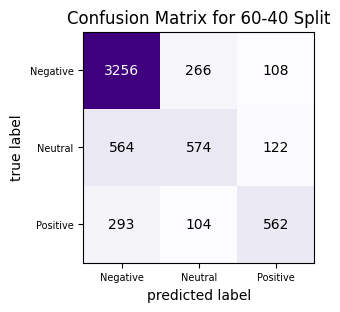

In [ ]:
predictions = Rf.predict(tfidf_vect.transform(x_test).toarray())
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
cm=confusion_matrix(y_test, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(3,3), hide_ticks=True, cmap = 'Purples')
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=7,color='black')
plt.yticks(range(3), ['Negative','Neutral', 'Positive'], fontsize=7)
plt.title('Confusion Matrix for 60-40 Split')

**Logistic Regression Model**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


[[3343  225   62]
 [ 603  580   77]
 [ 293  109  557]]
              precision    recall  f1-score   support

    negative       0.79      0.92      0.85      3630
     neutral       0.63      0.46      0.53      1260
    positive       0.80      0.58      0.67       959

    accuracy                           0.77      5849
   macro avg       0.74      0.65      0.69      5849
weighted avg       0.76      0.77      0.75      5849



Text(0.5, 1.0, 'Confusion Matrix for 60-40 Split')

<Figure size 640x480 with 0 Axes>

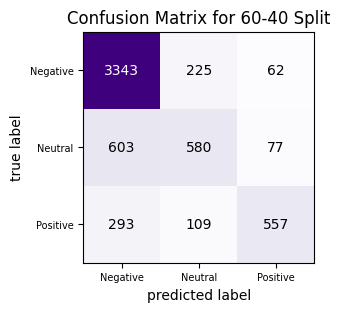

In [ ]:
predictions = lr.predict(tfidf_vect.transform(x_test).toarray())
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
cm=confusion_matrix(y_test, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(3,3), hide_ticks=True, cmap = 'Purples')
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=7,color='black')
plt.yticks(range(3), ['Negative','Neutral', 'Positive'], fontsize=7)
plt.title('Confusion Matrix for 60-40 Split')

**SVM Model**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


[[3320  229   81]
 [ 629  549   82]
 [ 287   97  575]]
              precision    recall  f1-score   support

    negative       0.78      0.91      0.84      3630
     neutral       0.63      0.44      0.51      1260
    positive       0.78      0.60      0.68       959

    accuracy                           0.76      5849
   macro avg       0.73      0.65      0.68      5849
weighted avg       0.75      0.76      0.75      5849



Text(0.5, 1.0, 'Confusion Matrix for 60-40 Split')

<Figure size 640x480 with 0 Axes>

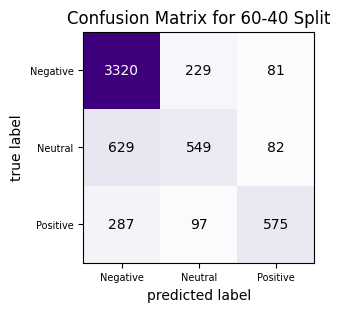

In [ ]:
predictions = svm.predict(tfidf_vect.transform(x_test).toarray())
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
cm=confusion_matrix(y_test, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(3,3), hide_ticks=True, cmap = 'Purples')
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=7,color='black')
plt.yticks(range(3), ['Negative','Neutral', 'Positive'], fontsize=7)
plt.title('Confusion Matrix for 60-40 Split')

# **Model with 70:30 Data Split Ratio**

In [ ]:
Tweets_train, Tweets_test = train_test_split(Tweets, test_size = 0.30, random_state = 26)

In [ ]:
Tweets_train.shape

(10248, 15)

Dropping Duplicates in the Dataset

In [ ]:
Tweets_train = Tweets_train.drop_duplicates()
Tweets_train.shape

(10230, 15)

Feature Selection

In [ ]:
selected_features = ['airline_sentiment', 'text']
Tweets_train = Tweets_train[selected_features]
Tweets_train.head(4)

airline_sentiment                                               text
5527           positive  @SouthwestAir I will do just about anything tO...
14290          negative  @AmericanAir why don't you have driver service...
4184           positive                               @united thank you! 😊
8181           positive  @JetBlue Thank you guys! Brilliant customer se...

Text Cleaning

In [ ]:
Tweets_train['clean_tweets'] = Tweets_train['text'].apply(cleaner)

<ipython-input-13-1ade4e6ee48c>:2: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


In [ ]:
Tweets_train.head(3)

airline_sentiment                                               text  \
5527           positive  @SouthwestAir I will do just about anything tO...   
14290          negative  @AmericanAir why don't you have driver service...   
4184           positive                               @united thank you! 😊   

                                            clean_tweets  
5527                                            vega man  
14290  driver service employee work bad weather like ...  
4184                      thank smiling face smiling eye

Data Vectorization

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=3000, min_df=7, max_df = 0.8, analyzer ='word')
tfidf_vect = tfidf_vectorizer.fit(Tweets_train['clean_tweets'])
X_tfidf = tfidf_vect.transform(Tweets_train['clean_tweets'])
feature_names = tfidf_vectorizer.get_feature_names_out()
X_matrix = pd.DataFrame(X_tfidf.toarray(), columns=feature_names)

Fitting the Models on the Training Data

In [ ]:
x_train = X_matrix
y_train = Tweets_train['airline_sentiment']

Complement Naive Bayes Model

[[5333  630  459]
 [ 556 1272  327]
 [ 169  119 1365]]
              precision    recall  f1-score   support

    negative       0.88      0.83      0.85      6422
     neutral       0.63      0.59      0.61      2155
    positive       0.63      0.83      0.72      1653

    accuracy                           0.78     10230
   macro avg       0.71      0.75      0.73     10230
weighted avg       0.79      0.78      0.78     10230



([<matplotlib.axis.YTick at 0x79e7224777f0>,
 [Text(0, 0, 'Negative'), Text(0, 1, 'Neutral'), Text(0, 2, 'Positive')])

<Figure size 640x480 with 0 Axes>

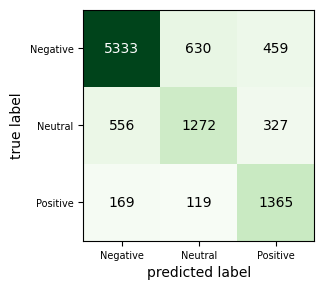

In [ ]:
cnb.fit(x_train, y_train)
predictions = cnb.predict(x_train)
print(confusion_matrix(y_train, predictions))
print(classification_report(y_train, predictions))
cm=confusion_matrix(y_train, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(3,3), hide_ticks=True, cmap="Greens")
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=7,color='black')
plt.yticks(range(3), ['Negative','Neutral', 'Positive'], fontsize=7)

Random Forest Model

[[6340   78    4]
 [  20 2098   37]
 [   9   44 1600]]
              precision    recall  f1-score   support

    negative       1.00      0.99      0.99      6422
     neutral       0.95      0.97      0.96      2155
    positive       0.98      0.97      0.97      1653

    accuracy                           0.98     10230
   macro avg       0.97      0.98      0.97     10230
weighted avg       0.98      0.98      0.98     10230



([<matplotlib.axis.YTick at 0x79e7224e57e0>,
 [Text(0, 0, 'Negative'), Text(0, 1, 'Neutral'), Text(0, 2, 'Positive')])

<Figure size 640x480 with 0 Axes>

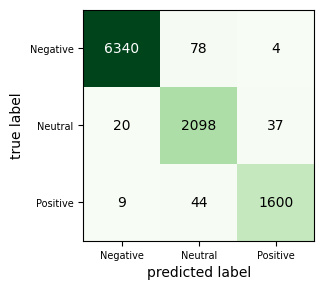

In [ ]:
Rf.fit(x_train, y_train)
predictions = Rf.predict(x_train)
print(confusion_matrix(y_train, predictions))
print(classification_report(y_train, predictions))
cm=confusion_matrix(y_train, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(3,3), hide_ticks=True, cmap="Greens")
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=7,color='black')
plt.yticks(range(3), ['Negative','Neutral', 'Positive'], fontsize=7)

Logistic Regression Model

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[6077  260   85]
 [ 818 1220  117]
 [ 386  155 1112]]
              precision    recall  f1-score   support

    negative       0.83      0.95      0.89      6422
     neutral       0.75      0.57      0.64      2155
    positive       0.85      0.67      0.75      1653

    accuracy                           0.82     10230
   macro avg       0.81      0.73      0.76     10230
weighted avg       0.82      0.82      0.81     10230



([<matplotlib.axis.YTick at 0x79e722496e90>,
 [Text(0, 0, 'Negative'), Text(0, 1, 'Neutral'), Text(0, 2, 'Positive')])

<Figure size 640x480 with 0 Axes>

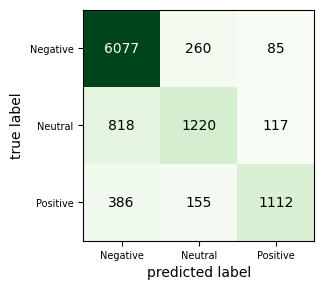

In [ ]:
lr.fit(x_train, y_train)
predictions = lr.predict(x_train)
print(confusion_matrix(y_train, predictions))
print(classification_report(y_train, predictions))
cm=confusion_matrix(y_train, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(3,3), hide_ticks=True, cmap="Greens")
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=7,color='black')
plt.yticks(range(3), ['Negative','Neutral', 'Positive'], fontsize=7)

SVM Model

[[6053  262  107]
 [ 834 1205  116]
 [ 359  127 1167]]
              precision    recall  f1-score   support

    negative       0.84      0.94      0.89      6422
     neutral       0.76      0.56      0.64      2155
    positive       0.84      0.71      0.77      1653

    accuracy                           0.82     10230
   macro avg       0.81      0.74      0.77     10230
weighted avg       0.82      0.82      0.82     10230



([<matplotlib.axis.YTick at 0x79e7227f0e50>,
 [Text(0, 0, 'Negative'), Text(0, 1, 'Neutral'), Text(0, 2, 'Positive')])

<Figure size 640x480 with 0 Axes>

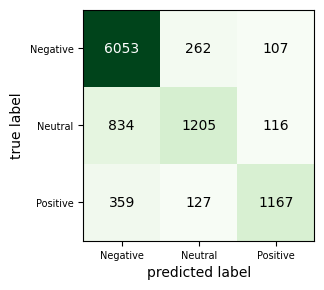

In [ ]:
svm.fit(x_train, y_train)
predictions = svm.predict(x_train)
print(confusion_matrix(y_train, predictions))
print(classification_report(y_train, predictions))
cm=confusion_matrix(y_train, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(3,3), hide_ticks=True, cmap="Greens")
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=7,color='black')
plt.yticks(range(3), ['Negative','Neutral', 'Positive'], fontsize=7)

**Test Dataset Pre-processing**

In [ ]:
Tweets_test.shape

(4392, 15)

Handling Duplicates

In [ ]:
Tweets_test = Tweets_test.drop_duplicates()
Tweets_test.shape

(4389, 15)

Feature Selection

In [ ]:
select_features = ['airline_sentiment', 'text']
Tweets_test = Tweets_test[select_features]
Tweets_test.head(4)

airline_sentiment                                               text
11637          negative  @USAirways flights keep getting delayed and Ca...
6096           positive  @SouthwestAir - Great flight from Phoenix to D...
2370            neutral  @united I haven't booked yet, I'm asking befor...
13300           neutral  @AmericanAir its only 1500 characters, i will ...

Text Cleaning

In [ ]:
Tweets_test['clean_tweets']= Tweets_test['text'].apply(cleaner)

<ipython-input-13-1ade4e6ee48c>:2: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


In [ ]:
Tweets_test.tail(3)

airline_sentiment                                               text  \
5768          positive  @SouthwestAir I love imagine dragons o flippin...   
565           negative  @united. ..I received on other flights. #unite...   
7955          negative  @JetBlue I don't have enough hands to count th...   

                                           clean_tweets  
5768                   love imagine dragon flipping pls  
565                  received flight truly break guitar  
7955  hand count number time like delayed flight guy...

**Performance of the Models on the Test Dataset**

In [ ]:
x_test = Tweets_test['clean_tweets']
y_test = Tweets_test['airline_sentiment']

Complement Naive Bayes Model

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ComplementNB was fitted with feature names
  warnings.warn(


[[2236  305  204]
 [ 282  497  161]
 [  86   68  550]]
              precision    recall  f1-score   support

    negative       0.86      0.81      0.84      2745
     neutral       0.57      0.53      0.55       940
    positive       0.60      0.78      0.68       704

    accuracy                           0.75      4389
   macro avg       0.68      0.71      0.69      4389
weighted avg       0.76      0.75      0.75      4389



Text(0.5, 1.0, 'Confusion Matrix for 70-30 Split')

<Figure size 640x480 with 0 Axes>

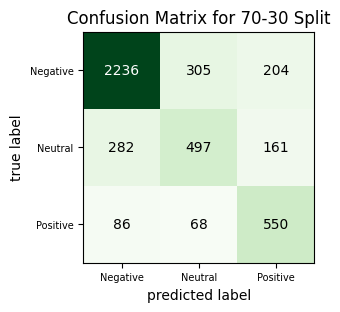

In [ ]:
predictions = cnb.predict(tfidf_vect.transform(x_test).toarray())
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
cm=confusion_matrix(y_test, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(3,3), hide_ticks=True, cmap = 'Greens')
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=7,color='black')
plt.yticks(range(3), ['Negative','Neutral', 'Positive'], fontsize=7)
plt.title('Confusion Matrix for 70-30 Split')

Random Forest Model

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[[2458  202   85]
 [ 447  397   96]
 [ 214   71  419]]
              precision    recall  f1-score   support

    negative       0.79      0.90      0.84      2745
     neutral       0.59      0.42      0.49       940
    positive       0.70      0.60      0.64       704

    accuracy                           0.75      4389
   macro avg       0.69      0.64      0.66      4389
weighted avg       0.73      0.75      0.73      4389



Text(0.5, 1.0, 'Confusion Matrix for 70-30 Split')

<Figure size 640x480 with 0 Axes>

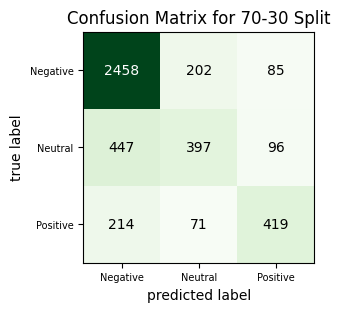

In [ ]:
predictions = Rf.predict(tfidf_vect.transform(x_test).toarray())
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
cm=confusion_matrix(y_test, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(3,3), hide_ticks=True, cmap = 'Greens')
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=7,color='black')
plt.yticks(range(3), ['Negative','Neutral', 'Positive'], fontsize=7)
plt.title('Confusion Matrix for 70-30 Split')

Logistic Regression Model

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


[[2521  173   51]
 [ 430  444   66]
 [ 188   78  438]]
              precision    recall  f1-score   support

    negative       0.80      0.92      0.86      2745
     neutral       0.64      0.47      0.54       940
    positive       0.79      0.62      0.70       704

    accuracy                           0.78      4389
   macro avg       0.74      0.67      0.70      4389
weighted avg       0.77      0.78      0.76      4389



Text(0.5, 1.0, 'Confusion Matrix for 70-30 Split')

<Figure size 640x480 with 0 Axes>

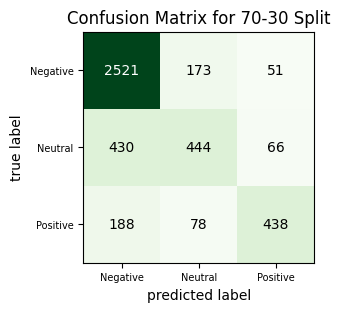

In [ ]:
predictions = lr.predict(tfidf_vect.transform(x_test).toarray())
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
cm=confusion_matrix(y_test, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(3,3), hide_ticks=True, cmap = 'Greens')
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=7,color='black')
plt.yticks(range(3), ['Negative','Neutral', 'Positive'], fontsize=7)
plt.title('Confusion Matrix for 70-30 Split')

SVM Model

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


[[2493  195   57]
 [ 439  439   62]
 [ 183   74  447]]
              precision    recall  f1-score   support

    negative       0.80      0.91      0.85      2745
     neutral       0.62      0.47      0.53       940
    positive       0.79      0.63      0.70       704

    accuracy                           0.77      4389
   macro avg       0.74      0.67      0.70      4389
weighted avg       0.76      0.77      0.76      4389



Text(0.5, 1.0, 'Confusion Matrix for 70-30 Split')

<Figure size 640x480 with 0 Axes>

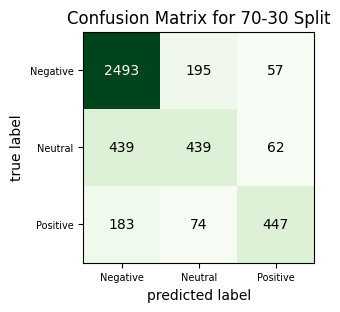

In [ ]:
predictions = svm.predict(tfidf_vect.transform(x_test).toarray())
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
cm=confusion_matrix(y_test, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(3,3), hide_ticks=True, cmap = 'Greens')
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=7,color='black')
plt.yticks(range(3), ['Negative','Neutral', 'Positive'], fontsize=7)
plt.title('Confusion Matrix for 70-30 Split')

# **Model with 80:20 Data Split Ratio**

In [ ]:
Tweets_train, Tweets_test = train_test_split(Tweets, test_size = 0.20, random_state = 26)

In [ ]:
Tweets_train.shape

(11712, 15)

Dropping Duplicates in the Dataset

In [ ]:
Tweets_train = Tweets_train.drop_duplicates()
Tweets_train.shape

(11688, 15)

Feature Selection

In [ ]:
selected_features = ['airline_sentiment', 'text']
Tweets_train = Tweets_train[selected_features]
Tweets_train.head(4)

airline_sentiment                                               text
8191          negative  @jetblue we never received that $15 credit for...
8561           neutral    @JetBlue Any EMS window seats on 1099 tomorrow?
1306          positive     @united Was able to send the DM. All good now.
2322          negative  @united allowing passengers on my flight to bl...

Text Cleaning

In [ ]:
Tweets_train['clean_tweets'] = Tweets_train['text'].apply(cleaner)

<ipython-input-13-1ade4e6ee48c>:2: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


In [ ]:
Tweets_train.head(3)

airline_sentiment                                               text  \
8191          negative  @jetblue we never received that $15 credit for...   
8561           neutral    @JetBlue Any EMS window seats on 1099 tomorrow?   
1306          positive     @united Was able to send the DM. All good now.   

                                           clean_tweets  
8191  received credit inoperable tv sfo jfk flight w...  
8561                            em window seat tomorrow  
1306                                     able send good

Data Vectorization

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=3000, min_df=7, max_df = 0.8, analyzer ='word')
tfidf_vect = tfidf_vectorizer.fit(Tweets_train['clean_tweets'])
X_tfidf = tfidf_vect.transform(Tweets_train['clean_tweets'])
feature_names = tfidf_vectorizer.get_feature_names_out()
X_matrix = pd.DataFrame(X_tfidf.toarray(), columns=feature_names)

**Fitting the Models on the Training Data**

In [ ]:
x_train = X_matrix
y_train = Tweets_train['airline_sentiment']

[[6139  714  492]
 [ 631 1470  373]
 [ 198  137 1534]]
              precision    recall  f1-score   support

    negative       0.88      0.84      0.86      7345
     neutral       0.63      0.59      0.61      2474
    positive       0.64      0.82      0.72      1869

    accuracy                           0.78     11688
   macro avg       0.72      0.75      0.73     11688
weighted avg       0.79      0.78      0.78     11688



Text(0.5, 1.0, '80-20 Data Split\nTrain Set Confusion Matrix')

<Figure size 640x480 with 0 Axes>

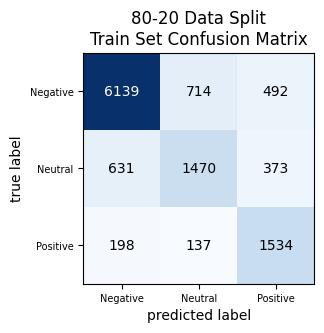

In [ ]:
cnb.fit(x_train, y_train)
predictions = cnb.predict(x_train)
print(confusion_matrix(y_train, predictions))
print(classification_report(y_train, predictions))
cm=confusion_matrix(y_train, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(3,3), hide_ticks=True)
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=7,color='black')
plt.yticks(range(3), ['Negative','Neutral', 'Positive'], fontsize=7)
plt.title('80-20 Data Split\nTrain Set Confusion Matrix')

Random Forest Model

[[7252   85    8]
 [  22 2401   51]
 [  11   40 1818]]
              precision    recall  f1-score   support

    negative       1.00      0.99      0.99      7345
     neutral       0.95      0.97      0.96      2474
    positive       0.97      0.97      0.97      1869

    accuracy                           0.98     11688
   macro avg       0.97      0.98      0.97     11688
weighted avg       0.98      0.98      0.98     11688



Text(0.5, 1.0, '80-20 Data Split\nTrain Set Confusion Matrix')

<Figure size 640x480 with 0 Axes>

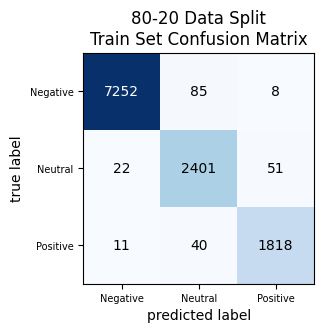

In [ ]:
Rf.fit(x_train, y_train)
predictions = Rf.predict(x_train)
print(confusion_matrix(y_train, predictions))
print(classification_report(y_train, predictions))
cm=confusion_matrix(y_train, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(3,3), hide_ticks=True)
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=7,color='black')
plt.yticks(range(3), ['Negative','Neutral', 'Positive'], fontsize=7)
plt.title('80-20 Data Split\nTrain Set Confusion Matrix')

Logistic Regression Model

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[6932  309  104]
 [ 938 1402  134]
 [ 432  177 1260]]
              precision    recall  f1-score   support

    negative       0.83      0.94      0.89      7345
     neutral       0.74      0.57      0.64      2474
    positive       0.84      0.67      0.75      1869

    accuracy                           0.82     11688
   macro avg       0.81      0.73      0.76     11688
weighted avg       0.82      0.82      0.81     11688



Text(0.5, 1.0, '80-20 Data Split\nTrain Set Confusion Matrix')

<Figure size 640x480 with 0 Axes>

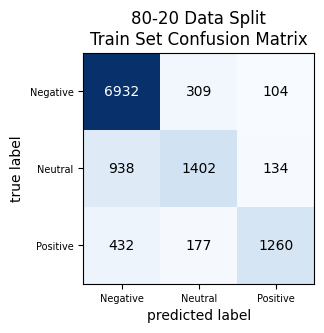

In [ ]:
lr.fit(x_train, y_train)
predictions = lr.predict(x_train)
print(confusion_matrix(y_train, predictions))
print(classification_report(y_train, predictions))
cm=confusion_matrix(y_train, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(3,3), hide_ticks=True)
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=7,color='black')
plt.yticks(range(3), ['Negative','Neutral', 'Positive'], fontsize=7)
plt.title('80-20 Data Split\nTrain Set Confusion Matrix')

SVM Model

[[6908  317  120]
 [ 899 1434  141]
 [ 385  140 1344]]
              precision    recall  f1-score   support

    negative       0.84      0.94      0.89      7345
     neutral       0.76      0.58      0.66      2474
    positive       0.84      0.72      0.77      1869

    accuracy                           0.83     11688
   macro avg       0.81      0.75      0.77     11688
weighted avg       0.82      0.83      0.82     11688



Text(0.5, 1.0, '80-20 Data Split\nTrain Set Confusion Matrix')

<Figure size 640x480 with 0 Axes>

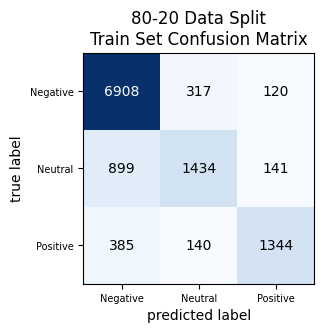

In [ ]:
svm.fit(x_train, y_train)
predictions = svm.predict(x_train)
print(confusion_matrix(y_train, predictions))
print(classification_report(y_train, predictions))
cm=confusion_matrix(y_train, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(3,3), hide_ticks=True)
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=7,color='black')
plt.yticks(range(3), ['Negative','Neutral', 'Positive'], fontsize=7)
plt.title('80-20 Data Split\nTrain Set Confusion Matrix')

**Test Dataset Pre-processing**

In [ ]:
Tweets_test.shape

(2928, 15)

Handling Duplicates

In [ ]:
Tweets_test = Tweets_test.drop_duplicates()
Tweets_test.shape

(2925, 15)

Feature Selection

In [ ]:
select_features = ['airline_sentiment', 'text']
Tweets_test = Tweets_test[select_features]
Tweets_test.head(4)

airline_sentiment                                               text
11637          negative  @USAirways flights keep getting delayed and Ca...
6096           positive  @SouthwestAir - Great flight from Phoenix to D...
2370            neutral  @united I haven't booked yet, I'm asking befor...
13300           neutral  @AmericanAir its only 1500 characters, i will ...

Text Cleaning

In [ ]:
Tweets_test['clean_tweets']= Tweets_test['text'].apply(cleaner)

<ipython-input-13-1ade4e6ee48c>:2: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


In [ ]:
Tweets_test.tail(3)

airline_sentiment                                               text  \
7631           negative  @JetBlue  I'm at 4:05  will be nasty in Boston...   
10646          negative  @USAirways Not only did u lose the flight plan...   
9125           negative  @USAirways @AmericanAir Day 3 &amp; still no l...   

                                            clean_tweets  
7631   nasty boston family driving min pick erie thin...  
10646  lose flight plan flight crew faa timed thanks ...  
9125   day amp luggage chkd httptcombltalrbs statusaw...

**Performance of the Models on the Test Dataset**

In [ ]:
x_test = Tweets_test['clean_tweets']
y_test = Tweets_test['airline_sentiment']


Complement Naive Bayes Model

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ComplementNB was fitted with feature names
  warnings.warn(


[[1503  178  138]
 [ 196  323  101]
 [  62   51  373]]
              precision    recall  f1-score   support

    negative       0.85      0.83      0.84      1819
     neutral       0.59      0.52      0.55       620
    positive       0.61      0.77      0.68       486

    accuracy                           0.75      2925
   macro avg       0.68      0.70      0.69      2925
weighted avg       0.76      0.75      0.75      2925



Text(0.5, 1.0, '80-20 Data Split\nTest Set Confusion Matrix')

<Figure size 640x480 with 0 Axes>

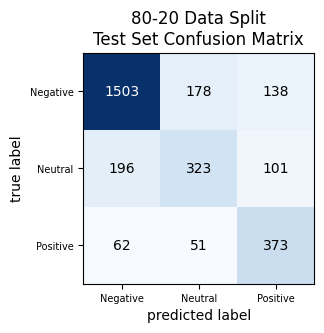

In [ ]:
predictions = cnb.predict(tfidf_vect.transform(x_test).toarray())
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
cm=confusion_matrix(y_test, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(3,3), hide_ticks=True)
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=7,color='black')
plt.yticks(range(3), ['Negative','Neutral', 'Positive'], fontsize=7)
plt.title('80-20 Data Split\nTest Set Confusion Matrix')

Random Forest Model

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[[1633  128   58]
 [ 278  273   69]
 [ 143   44  299]]
              precision    recall  f1-score   support

    negative       0.80      0.90      0.84      1819
     neutral       0.61      0.44      0.51       620
    positive       0.70      0.62      0.66       486

    accuracy                           0.75      2925
   macro avg       0.70      0.65      0.67      2925
weighted avg       0.74      0.75      0.74      2925



Text(0.5, 1.0, '80-20 Data Split\nTest Set Confusion Matrix')

<Figure size 640x480 with 0 Axes>

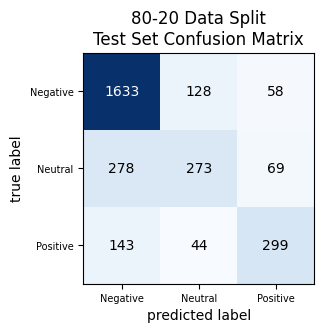

In [ ]:
predictions = Rf.predict(tfidf_vect.transform(x_test).toarray())
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
cm=confusion_matrix(y_test, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(3,3), hide_ticks=True)
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=7,color='black')
plt.yticks(range(3), ['Negative','Neutral', 'Positive'], fontsize=7)
plt.title('80-20 Data Split\nTest Set Confusion Matrix')

Logistic Regression Model

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


[[1677  114   28]
 [ 287  290   43]
 [ 128   50  308]]
              precision    recall  f1-score   support

    negative       0.80      0.92      0.86      1819
     neutral       0.64      0.47      0.54       620
    positive       0.81      0.63      0.71       486

    accuracy                           0.78      2925
   macro avg       0.75      0.67      0.70      2925
weighted avg       0.77      0.78      0.77      2925



Text(0.5, 1.0, '80-20 Data Split\nTest Set Confusion Matrix')

<Figure size 640x480 with 0 Axes>

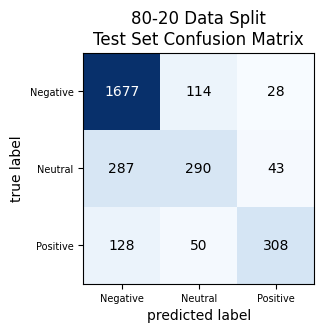

In [ ]:
predictions = lr.predict(tfidf_vect.transform(x_test).toarray())
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
cm=confusion_matrix(y_test, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(3,3), hide_ticks=True)
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=7,color='black')
plt.yticks(range(3), ['Negative','Neutral', 'Positive'], fontsize=7)
plt.title('80-20 Data Split\nTest Set Confusion Matrix')

SVM Model

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


[[1659  122   38]
 [ 274  300   46]
 [ 120   53  313]]
              precision    recall  f1-score   support

    negative       0.81      0.91      0.86      1819
     neutral       0.63      0.48      0.55       620
    positive       0.79      0.64      0.71       486

    accuracy                           0.78      2925
   macro avg       0.74      0.68      0.70      2925
weighted avg       0.77      0.78      0.77      2925



Text(0.5, 1.0, '80-20 Data Split\nTest Set Confusion Matrix')

<Figure size 640x480 with 0 Axes>

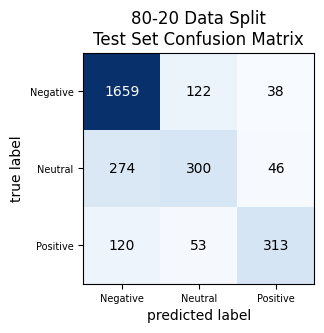

In [ ]:
predictions = svm.predict(tfidf_vect.transform(x_test).toarray())
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
cm=confusion_matrix(y_test, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(3,3), hide_ticks=True)
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=7,color='black')
plt.yticks(range(3), ['Negative','Neutral', 'Positive'], fontsize=7)
plt.title('80-20 Data Split\nTest Set Confusion Matrix')

# **Model with Feature Engineering**

Data Split into Train(80%) and Test(20%) Sets

In [ ]:
Tweets_train, Tweets_test = train_test_split(Tweets, test_size = 0.20, random_state = 40)

# Train dataset

In [ ]:
Tweets_train.shape

(11712, 15)

Handling Duplicates

In [ ]:
Tweets_train = Tweets_train.drop_duplicates()
Tweets_train.shape

(11690, 15)

**FEATURE ENGINEERING**

Feature Selection

In [ ]:
selected_features = ['airline_sentiment','negativereason', 'text']
Tweets_train = Tweets_train[selected_features]
Tweets_train.head(4)

airline_sentiment          negativereason  \
9781           negative  Customer Service Issue   
11947          negative             Late Flight   
6426           negative              Can't Tell   
6875           negative              Can't Tell   

                                                    text  
9781   @USAirways so I guess you are ok with people b...  
11947  @AmericanAir delayed on the way to Puerto Rico...  
6426   @SouthwestAir not very helpful trying to get o...  
6875   @JetBlue JFK NYC staff is amazing. The #lax Je...

Feature Construction

In [ ]:
Tweets_train = Tweets_train.fillna(' ') #replacing missing values with a blank space
Tweets_train.head(4)

airline_sentiment          negativereason  \
9781           negative  Customer Service Issue   
11947          negative             Late Flight   
6426           negative              Can't Tell   
6875           negative              Can't Tell   

                                                    text  
9781   @USAirways so I guess you are ok with people b...  
11947  @AmericanAir delayed on the way to Puerto Rico...  
6426   @SouthwestAir not very helpful trying to get o...  
6875   @JetBlue JFK NYC staff is amazing. The #lax Je...

In [ ]:
merge_text = ['text', 'negativereason']

Tweets_train['merge_text'] = Tweets_train[merge_text].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
Tweets_train.head()

airline_sentiment          negativereason  \
9781           negative  Customer Service Issue   
11947          negative             Late Flight   
6426           negative              Can't Tell   
6875           negative              Can't Tell   
13339           neutral                           

                                                    text  \
9781   @USAirways so I guess you are ok with people b...   
11947  @AmericanAir delayed on the way to Puerto Rico...   
6426   @SouthwestAir not very helpful trying to get o...   
6875   @JetBlue JFK NYC staff is amazing. The #lax Je...   
13339                             @AmericanAir thank you   

                                              merge_text  
9781   @USAirways so I guess you are ok with people b...  
11947  @AmericanAir delayed on the way to Puerto Rico...  
6426   @SouthwestAir not very helpful trying to get o...  
6875   @JetBlue JFK NYC staff is amazing. The #lax Je...  
13339                           @AmericanAir thank you

Text Cleaning

In [ ]:
Tweets_train['clean_tweets'] = Tweets_train['merge_text'].apply(cleaner)

<ipython-input-13-1ade4e6ee48c>:2: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


In [ ]:
Tweets_train.head(3)

airline_sentiment          negativereason  \
9781           negative  Customer Service Issue   
11947          negative             Late Flight   
6426           negative              Can't Tell   

                                                    text  \
9781   @USAirways so I guess you are ok with people b...   
11947  @AmericanAir delayed on the way to Puerto Rico...   
6426   @SouthwestAir not very helpful trying to get o...   

                                              merge_text  \
9781   @USAirways so I guess you are ok with people b...   
11947  @AmericanAir delayed on the way to Puerto Rico...   
6426   @SouthwestAir not very helpful trying to get o...   

                                            clean_tweets  
9781   guess people sexually assaulted flight nice cu...  
11947  delayed way puerto rico delayed way new york d...  
6426   helpful trying nashvilleshould waive change fe...

Data Vectorization

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=3000, min_df=7, max_df = 0.8, analyzer ='word')
X_vect = tfidf_vectorizer.fit(Tweets_train['clean_tweets'])
X_tfidf = X_vect.transform(Tweets_train['clean_tweets'])
feature_names = tfidf_vectorizer.get_feature_names_out()
X_matrix = pd.DataFrame(X_tfidf.toarray(), columns=feature_names)

Fitting the Models on the Training Data

In [ ]:
x_train = X_matrix
y_train = Tweets_train['airline_sentiment']

Complement Naive Bayes Model

The Accuracy for the Complement Naive Bayes model is:  0.87
[[6928  232  144]
 [ 485 1604  381]
 [ 152  174 1590]]
              precision    recall  f1-score   support

    negative       0.92      0.95      0.93      7304
     neutral       0.80      0.65      0.72      2470
    positive       0.75      0.83      0.79      1916

    accuracy                           0.87     11690
   macro avg       0.82      0.81      0.81     11690
weighted avg       0.86      0.87      0.86     11690



Text(0.5, 1.0, 'Train Set Confusion Matrix')

<Figure size 640x480 with 0 Axes>

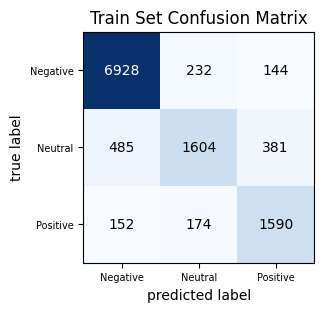

In [ ]:
cnb.fit(x_train, y_train)
predictions = cnb.predict(x_train)
train_accuracy = accuracy_score(y_train, predictions)
print('The Accuracy for the Complement Naive Bayes model is: ', round(train_accuracy,2))
print(confusion_matrix(y_train, predictions))
print(classification_report(y_train, predictions))
cm=confusion_matrix(y_train, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(3,3), hide_ticks=True)
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=7,color='black')
plt.yticks(range(3), ['Negative','Neutral', 'Positive'], fontsize=7)
plt.title('Train Set Confusion Matrix')

Random Forest Model

The Train Set Accuracy for the Random Forest model is:  0.99
[[7304    0    0]
 [   0 2431   39]
 [   1   51 1864]]
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      7304
     neutral       0.98      0.98      0.98      2470
    positive       0.98      0.97      0.98      1916

    accuracy                           0.99     11690
   macro avg       0.99      0.99      0.99     11690
weighted avg       0.99      0.99      0.99     11690



Text(0.5, 1.0, 'Train Set Confusion Matrix')

<Figure size 640x480 with 0 Axes>

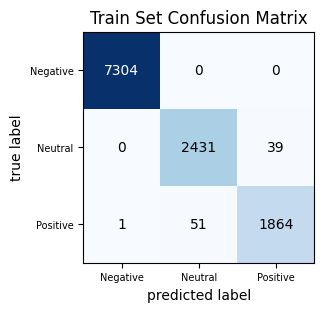

In [ ]:
Rf.fit(x_train, y_train)
predictions = Rf.predict(x_train)
train_accuracy = accuracy_score(y_train, predictions)
print('The Train Set Accuracy for the Random Forest model is: ', round(train_accuracy,2))
print(confusion_matrix(y_train, predictions))
print(classification_report(y_train, predictions))
cm=confusion_matrix(y_train, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(3,3), hide_ticks=True)
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=7,color='black')
plt.yticks(range(3), ['Negative','Neutral', 'Positive'], fontsize=7)
plt.title('Train Set Confusion Matrix')

Logistic Regression Model

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The Train set Accuracy for the Logistic Regression model is:  0.94
[[7296    5    3]
 [ 155 2136  179]
 [  79  313 1524]]
              precision    recall  f1-score   support

    negative       0.97      1.00      0.98      7304
     neutral       0.87      0.86      0.87      2470
    positive       0.89      0.80      0.84      1916

    accuracy                           0.94     11690
   macro avg       0.91      0.89      0.90     11690
weighted avg       0.94      0.94      0.94     11690



Text(0.5, 1.0, 'Train Set Confusion Matrix')

<Figure size 640x480 with 0 Axes>

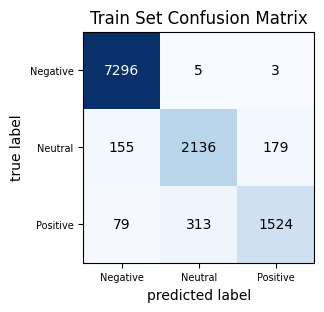

In [ ]:
lr.fit(x_train, y_train)
predictions = lr.predict(x_train)
train_accuracy = accuracy_score(y_train, predictions)
print('The Train set Accuracy for the Logistic Regression model is: ', round(train_accuracy,2))
print(confusion_matrix(y_train, predictions))
print(classification_report(y_train, predictions))
cm=confusion_matrix(y_train, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(3,3), hide_ticks=True)
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=7,color='black')
plt.yticks(range(3), ['Negative','Neutral', 'Positive'], fontsize=7)
plt.title('Train Set Confusion Matrix')

SVM Model

The Train set Accuracy for the SVM model is:  0.94
[[7303    1    0]
 [ 120 2157  193]
 [  67  273 1576]]
              precision    recall  f1-score   support

    negative       0.98      1.00      0.99      7304
     neutral       0.89      0.87      0.88      2470
    positive       0.89      0.82      0.86      1916

    accuracy                           0.94     11690
   macro avg       0.92      0.90      0.91     11690
weighted avg       0.94      0.94      0.94     11690



Text(0.5, 1.0, 'Train Set Confusion Matrix')

<Figure size 640x480 with 0 Axes>

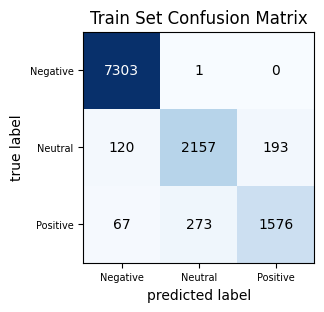

In [ ]:
svm.fit(x_train, y_train)
predictions = svm.predict(x_train)
train_accuracy = accuracy_score(y_train, predictions)
print('The Train set Accuracy for the SVM model is: ', round(train_accuracy,2))
print(confusion_matrix(y_train, predictions))
print(classification_report(y_train, predictions))
cm=confusion_matrix(y_train, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(3,3), hide_ticks=True)
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=7,color='black')
plt.yticks(range(3), ['Negative','Neutral', 'Positive'], fontsize=7)
plt.title('Train Set Confusion Matrix')

**Test Dataset Pre-processing**

In [ ]:
Tweets_test.shape

(2928, 15)

Handling Duplicates

In [ ]:
Tweets_test = Tweets_test.drop_duplicates()
Tweets_test.shape #no duplicates in the test dataset

(2928, 15)

**FEATURE ENGINEERING**

Feature Selection

In [ ]:
select_features = ['airline_sentiment', 'text', 'negativereason']
Tweets_test = Tweets_test[select_features]
Tweets_test.head(4)

airline_sentiment                                               text  \
1147           negative  @united a) she's an international. Her phone i...   
3333           positive                                 @united Thank you.   
12194          negative  @AmericanAir actually, online indicates the on...   
7660           negative  @JetBlue a voucher.. I can't believe I took th...   

                negativereason  
1147               Late Flight  
3333                       NaN  
12194  Flight Booking Problems  
7660                Bad Flight

Handling Missing Values in the Selected Features

In [ ]:
Tweets_test = Tweets_test.fillna(' ') #replacing the missing values with blank space
Tweets_test.head(4)

airline_sentiment                                               text  \
1147           negative  @united a) she's an international. Her phone i...   
3333           positive                                 @united Thank you.   
12194          negative  @AmericanAir actually, online indicates the on...   
7660           negative  @JetBlue a voucher.. I can't believe I took th...   

                negativereason  
1147               Late Flight  
3333                            
12194  Flight Booking Problems  
7660                Bad Flight

Feature Construction

In [ ]:
merge_text = ['text', 'negativereason']

Tweets_test['merge_text'] = Tweets_test[merge_text].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
Tweets_test.head()

airline_sentiment                                               text  \
1147           negative  @united a) she's an international. Her phone i...   
3333           positive                                 @united Thank you.   
12194          negative  @AmericanAir actually, online indicates the on...   
7660           negative  @JetBlue a voucher.. I can't believe I took th...   
3345           negative  @united As it always is. Helps to communicate ...   

                negativereason  \
1147               Late Flight   
3333                             
12194  Flight Booking Problems   
7660                Bad Flight   
3345               Late Flight   

                                              merge_text  
1147   @united a) she's an international. Her phone i...  
3333                                @united Thank you.    
12194  @AmericanAir actually, online indicates the on...  
7660   @JetBlue a voucher.. I can't believe I took th...  
3345   @united As it always is. Helps to communicate ...

Text Cleaning

In [ ]:
Tweets_test['clean_tweets']= Tweets_test['merge_text'].apply(cleaner)

<ipython-input-13-1ade4e6ee48c>:2: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


In [ ]:
Tweets_test.tail(3)

airline_sentiment                                               text  \
10797           neutral  @USAirways have scheduled flight Sat(2morrow) ...   
1560           negative  @united I understand the intention, but it pal...   
10080          positive  @USAirways Thanks to the friendly US Airways s...   

      negativereason                                         merge_text  \
10797                 @USAirways have scheduled flight Sat(2morrow) ...   
1560    Lost Luggage  @united I understand the intention, but it pal...   
10080                 @USAirways Thanks to the friendly US Airways s...   

                                            clean_tweets  
10797  scheduled flight satmorrow choclt cho need add...  
1560   understand intention pale comparison day lost ...  
10080  thanks friendly airway staff helped booked fli...

Performance of the Models on the Test Dataset

In [ ]:
x_test = Tweets_test['clean_tweets']
y_test = Tweets_test['airline_sentiment']

Complement Naive Bayes Model

[[1766   55   41]
 [ 168  355  101]
 [  51   47  344]]
              precision    recall  f1-score   support

    negative       0.89      0.95      0.92      1862
     neutral       0.78      0.57      0.66       624
    positive       0.71      0.78      0.74       442

    accuracy                           0.84      2928
   macro avg       0.79      0.77      0.77      2928
weighted avg       0.84      0.84      0.84      2928

The Test set Accuracy for the CNB model is:  0.94


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ComplementNB was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Test Dataset\nConfusion Matrix')

<Figure size 640x480 with 0 Axes>

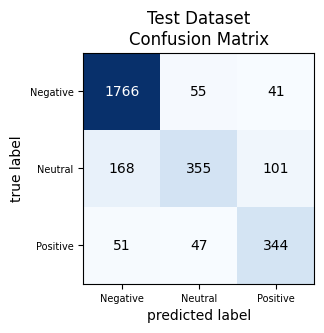

In [ ]:
predictions = cnb.predict(X_vect.transform(x_test).toarray())
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print('The Test set Accuracy for the CNB model is: ', round(train_accuracy,2))
cm=confusion_matrix(y_test, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(3,3), hide_ticks=True)
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=7,color='black')
plt.yticks(range(3), ['Negative','Neutral', 'Positive'], fontsize=7)
plt.title('Test Dataset\nConfusion Matrix')

Random Forest Model

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[[1862    0    0]
 [  46  487   91]
 [  24   93  325]]
              precision    recall  f1-score   support

    negative       0.96      1.00      0.98      1862
     neutral       0.84      0.78      0.81       624
    positive       0.78      0.74      0.76       442

    accuracy                           0.91      2928
   macro avg       0.86      0.84      0.85      2928
weighted avg       0.91      0.91      0.91      2928

The Test set Accuracy for the Random Forest model is:  0.94


Text(0.5, 1.0, 'Test Dataset\nConfusion Matrix')

<Figure size 640x480 with 0 Axes>

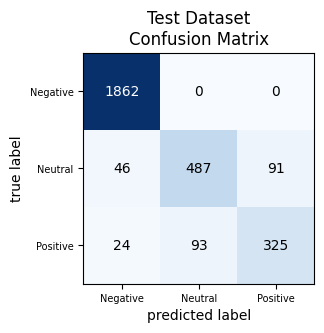

In [ ]:
predictions = Rf.predict(X_vect.transform(x_test).toarray())
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print('The Test set Accuracy for the Random Forest model is: ', round(train_accuracy,2))
cm=confusion_matrix(y_test, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(3,3), hide_ticks=True)
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=7,color='black')
plt.yticks(range(3), ['Negative','Neutral', 'Positive'], fontsize=7)
plt.title('Test Dataset\nConfusion Matrix')

Logistic Regression Model

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


[[1859    1    2]
 [  47  514   63]
 [  25  103  314]]
              precision    recall  f1-score   support

    negative       0.96      1.00      0.98      1862
     neutral       0.83      0.82      0.83       624
    positive       0.83      0.71      0.76       442

    accuracy                           0.92      2928
   macro avg       0.87      0.84      0.86      2928
weighted avg       0.91      0.92      0.92      2928

The Test set Accuracy for the Logistic Regression model is:  0.94


Text(0.5, 1.0, 'Test Dataset\nConfusion Matrix')

<Figure size 640x480 with 0 Axes>

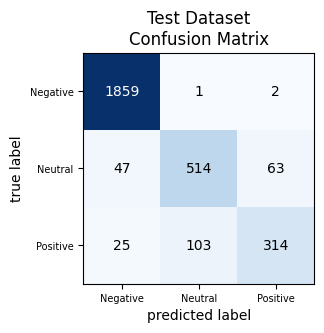

In [ ]:
predictions = lr.predict(X_vect.transform(x_test).toarray())
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print('The Test set Accuracy for the Logistic Regression model is: ', round(train_accuracy,2))
cm=confusion_matrix(y_test, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(3,3), hide_ticks=True)
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=7,color='black')
plt.yticks(range(3), ['Negative','Neutral', 'Positive'], fontsize=7)
plt.title('Test Dataset\nConfusion Matrix')

SVM Model

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


[[1861    0    1]
 [  35  528   61]
 [  18  101  323]]
              precision    recall  f1-score   support

    negative       0.97      1.00      0.99      1862
     neutral       0.84      0.85      0.84       624
    positive       0.84      0.73      0.78       442

    accuracy                           0.93      2928
   macro avg       0.88      0.86      0.87      2928
weighted avg       0.92      0.93      0.92      2928

The Test set Accuracy for the SVM model is:  0.94


Text(0.5, 1.0, 'Test Dataset\nConfusion Matrix')

<Figure size 640x480 with 0 Axes>

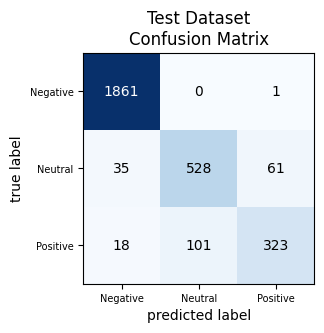

In [ ]:
predictions = svm.predict(X_vect.transform(x_test).toarray())
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print('The Test set Accuracy for the SVM model is: ', round(train_accuracy,2))
cm=confusion_matrix(y_test, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(3,3), hide_ticks=True)
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=7,color='black')
plt.yticks(range(3), ['Negative','Neutral', 'Positive'], fontsize=7)
plt.title('Test Dataset\nConfusion Matrix')

# **Model with Random Minority Oversampling**

Data Split into Train(80%) and Test(20%) Sets

In [ ]:
Tweets_train, Tweets_test = train_test_split(Tweets, test_size = 0.20, random_state = 40)

Train Dataset

In [ ]:
Tweets_train.shape

(11712, 15)

Handling Duplicates

In [ ]:
Tweets_train = Tweets_train.drop_duplicates()
Tweets_train.shape

(11690, 15)

**FEATURE ENGINEERING**

Feature Selection

In [ ]:
selected_features = ['airline_sentiment','negativereason', 'text']
Tweets_train = Tweets_train[selected_features]
Tweets_train.head(4)

airline_sentiment          negativereason  \
9781           negative  Customer Service Issue   
11947          negative             Late Flight   
6426           negative              Can't Tell   
6875           negative              Can't Tell   

                                                    text  
9781   @USAirways so I guess you are ok with people b...  
11947  @AmericanAir delayed on the way to Puerto Rico...  
6426   @SouthwestAir not very helpful trying to get o...  
6875   @JetBlue JFK NYC staff is amazing. The #lax Je...

Feature Construction

In [ ]:
Tweets_train = Tweets_train.fillna(' ') #replacing missing values with a blank space
Tweets_train.head(4)

airline_sentiment          negativereason  \
9781           negative  Customer Service Issue   
11947          negative             Late Flight   
6426           negative              Can't Tell   
6875           negative              Can't Tell   

                                                    text  
9781   @USAirways so I guess you are ok with people b...  
11947  @AmericanAir delayed on the way to Puerto Rico...  
6426   @SouthwestAir not very helpful trying to get o...  
6875   @JetBlue JFK NYC staff is amazing. The #lax Je...

In [ ]:
merge_text = ['text', 'negativereason']

Tweets_train['merge_text'] = Tweets_train[merge_text].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
Tweets_train.head()

airline_sentiment          negativereason  \
9781           negative  Customer Service Issue   
11947          negative             Late Flight   
6426           negative              Can't Tell   
6875           negative              Can't Tell   
13339           neutral                           

                                                    text  \
9781   @USAirways so I guess you are ok with people b...   
11947  @AmericanAir delayed on the way to Puerto Rico...   
6426   @SouthwestAir not very helpful trying to get o...   
6875   @JetBlue JFK NYC staff is amazing. The #lax Je...   
13339                             @AmericanAir thank you   

                                              merge_text  
9781   @USAirways so I guess you are ok with people b...  
11947  @AmericanAir delayed on the way to Puerto Rico...  
6426   @SouthwestAir not very helpful trying to get o...  
6875   @JetBlue JFK NYC staff is amazing. The #lax Je...  
13339                           @AmericanAir thank you

Text Cleaning

In [ ]:
Tweets_train['clean_tweets'] = Tweets_train['merge_text'].apply(cleaner)

<ipython-input-13-1ade4e6ee48c>:2: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


In [ ]:
Tweets_train.head(3)

airline_sentiment          negativereason  \
9781           negative  Customer Service Issue   
11947          negative             Late Flight   
6426           negative              Can't Tell   

                                                    text  \
9781   @USAirways so I guess you are ok with people b...   
11947  @AmericanAir delayed on the way to Puerto Rico...   
6426   @SouthwestAir not very helpful trying to get o...   

                                              merge_text  \
9781   @USAirways so I guess you are ok with people b...   
11947  @AmericanAir delayed on the way to Puerto Rico...   
6426   @SouthwestAir not very helpful trying to get o...   

                                            clean_tweets  
9781   guess people sexually assaulted flight nice cu...  
11947  delayed way puerto rico delayed way new york d...  
6426   helpful trying nashvilleshould waive change fe...

Data Vectorization

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=3000, min_df=7, max_df = 0.8, analyzer ='word')
X_vect = tfidf_vectorizer.fit(Tweets_train['clean_tweets'])
X_tfidf = X_vect.transform(Tweets_train['clean_tweets'])
feature_names = tfidf_vectorizer.get_feature_names_out()
X_matrix = pd.DataFrame(X_tfidf.toarray(), columns=feature_names)

Random Minority Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler()
X = X_matrix
y = Tweets_train['airline_sentiment']
x_train, y_train = ros.fit_resample(X, y)

In [ ]:
y_train.value_counts() #balanced dataset with the application of the Random Minority Oversampling

negative    7304
neutral     7304
positive    7304
Name: airline_sentiment, dtype: int64

Training Data Models

Complement Naive Bayes Model (CNB)

The Accuracy for the Complement Naive Bayes model is:  0.82
[[6847  283  174]
 [1283 4843 1178]
 [ 421  569 6314]]
              precision    recall  f1-score   support

    negative       0.80      0.94      0.86      7304
     neutral       0.85      0.66      0.75      7304
    positive       0.82      0.86      0.84      7304

    accuracy                           0.82     21912
   macro avg       0.82      0.82      0.82     21912
weighted avg       0.82      0.82      0.82     21912



Text(0.5, 1.0, 'Train Set Confusion Matrix')

<Figure size 640x480 with 0 Axes>

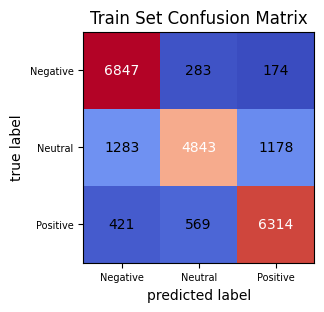

In [ ]:
cnb.fit(x_train, y_train)
predictions = cnb.predict(x_train)
train_accuracy = accuracy_score(y_train, predictions)
print('The Accuracy for the Complement Naive Bayes model is: ', round(train_accuracy,2))
print(confusion_matrix(y_train, predictions))
print(classification_report(y_train, predictions))
cm=confusion_matrix(y_train, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(3,3), hide_ticks=True, cmap='coolwarm')
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=7,color='black')
plt.yticks(range(3), ['Negative','Neutral', 'Positive'], fontsize=7)
plt.title('Train Set Confusion Matrix')

Random Forest Model

The Accuracy for the Random Forest model is:  0.99
[[7304    0    0]
 [   0 7160  144]
 [   1  161 7142]]
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      7304
     neutral       0.98      0.98      0.98      7304
    positive       0.98      0.98      0.98      7304

    accuracy                           0.99     21912
   macro avg       0.99      0.99      0.99     21912
weighted avg       0.99      0.99      0.99     21912



Text(0.5, 1.0, 'Train Set Confusion Matrix')

<Figure size 640x480 with 0 Axes>

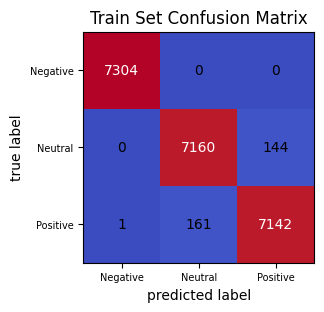

In [ ]:
Rf.fit(x_train, y_train)
predictions = Rf.predict(x_train)
train_accuracy = accuracy_score(y_train, predictions)
print('The Accuracy for the Random Forest model is: ', round(train_accuracy,2))
print(confusion_matrix(y_train, predictions))
print(classification_report(y_train, predictions))
cm=confusion_matrix(y_train, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(3,3), hide_ticks=True, cmap='coolwarm')
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=7,color='black')
plt.yticks(range(3), ['Negative','Neutral', 'Positive'], fontsize=7)
plt.title('Train Set Confusion Matrix')

Logistic Regression Model

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[7197   59   48]
 [ 166 6527  611]
 [  96  702 6506]]
              precision    recall  f1-score   support

    negative       0.96      0.99      0.98      7304
     neutral       0.90      0.89      0.89      7304
    positive       0.91      0.89      0.90      7304

    accuracy                           0.92     21912
   macro avg       0.92      0.92      0.92     21912
weighted avg       0.92      0.92      0.92     21912

The Accuracy for the Logistic Regression model is:  0.92


Text(0.5, 1.0, 'Train Set Confusion Matrix')

<Figure size 640x480 with 0 Axes>

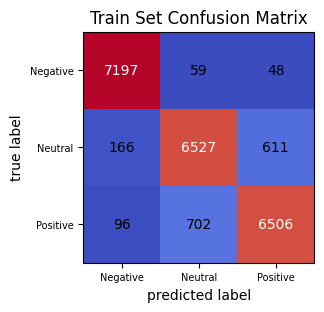

In [ ]:
lr.fit(x_train, y_train)
predictions = lr.predict(x_train)
train_accuracy = accuracy_score(y_train, predictions)
print(confusion_matrix(y_train, predictions))
print(classification_report(y_train, predictions))
print('The Accuracy for the Logistic Regression model is: ', round(train_accuracy,2))
cm=confusion_matrix(y_train, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(3,3), hide_ticks=True, cmap='coolwarm')
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=7,color='black')
plt.yticks(range(3), ['Negative','Neutral', 'Positive'], fontsize=7)
plt.title('Train Set Confusion Matrix')

SVM Model

The Accuracy for the SVM model is:  0.93
[[7273   19   12]
 [ 182 6445  677]
 [  87  626 6591]]
              precision    recall  f1-score   support

    negative       0.96      1.00      0.98      7304
     neutral       0.91      0.88      0.90      7304
    positive       0.91      0.90      0.90      7304

    accuracy                           0.93     21912
   macro avg       0.93      0.93      0.93     21912
weighted avg       0.93      0.93      0.93     21912



Text(0.5, 1.0, 'Train Set Confusion Matrix')

<Figure size 640x480 with 0 Axes>

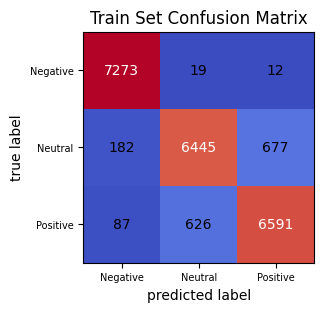

In [ ]:
svm.fit(x_train, y_train)
predictions = svm.predict(x_train)
train_accuracy = accuracy_score(y_train, predictions)
print('The Accuracy for the SVM model is: ', round(train_accuracy,2))
print(confusion_matrix(y_train, predictions))
print(classification_report(y_train, predictions))
cm=confusion_matrix(y_train, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(3,3), hide_ticks=True, cmap='coolwarm')
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=7,color='black')
plt.yticks(range(3), ['Negative','Neutral', 'Positive'], fontsize=7)
plt.title('Train Set Confusion Matrix')

**Test Dataset Pre-processing**

In [ ]:
Tweets_test.shape

(2928, 15)

Handling Duplicates

In [ ]:
Tweets_test = Tweets_test.drop_duplicates()
Tweets_test.shape #no duplicates in the test dataset

(2928, 15)

**FEATURE ENGINEERING**

Feature Selection

In [ ]:
select_features = ['airline_sentiment', 'text', 'negativereason']
Tweets_test = Tweets_test[select_features]
Tweets_test.head(4)

airline_sentiment                                               text  \
1147           negative  @united a) she's an international. Her phone i...   
3333           positive                                 @united Thank you.   
12194          negative  @AmericanAir actually, online indicates the on...   
7660           negative  @JetBlue a voucher.. I can't believe I took th...   

                negativereason  
1147               Late Flight  
3333                       NaN  
12194  Flight Booking Problems  
7660                Bad Flight

Handling Missing Values in the Selected Features

In [ ]:
Tweets_test = Tweets_test.fillna(' ') #replacing the missing values with blank space
Tweets_test.head(4)

airline_sentiment                                               text  \
1147           negative  @united a) she's an international. Her phone i...   
3333           positive                                 @united Thank you.   
12194          negative  @AmericanAir actually, online indicates the on...   
7660           negative  @JetBlue a voucher.. I can't believe I took th...   

                negativereason  
1147               Late Flight  
3333                            
12194  Flight Booking Problems  
7660                Bad Flight

Feature Construction

In [ ]:
merge_text = ['text', 'negativereason']

Tweets_test['merge_text'] = Tweets_test[merge_text].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
Tweets_test.head()

airline_sentiment                                               text  \
1147           negative  @united a) she's an international. Her phone i...   
3333           positive                                 @united Thank you.   
12194          negative  @AmericanAir actually, online indicates the on...   
7660           negative  @JetBlue a voucher.. I can't believe I took th...   
3345           negative  @united As it always is. Helps to communicate ...   

                negativereason  \
1147               Late Flight   
3333                             
12194  Flight Booking Problems   
7660                Bad Flight   
3345               Late Flight   

                                              merge_text  
1147   @united a) she's an international. Her phone i...  
3333                                @united Thank you.    
12194  @AmericanAir actually, online indicates the on...  
7660   @JetBlue a voucher.. I can't believe I took th...  
3345   @united As it always is. Helps to communicate ...

Text Cleaning

In [ ]:
Tweets_test['clean_tweets']= Tweets_test['merge_text'].apply(cleaner)

<ipython-input-13-1ade4e6ee48c>:2: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


In [ ]:
Tweets_test.tail(3)

airline_sentiment                                               text  \
10797           neutral  @USAirways have scheduled flight Sat(2morrow) ...   
1560           negative  @united I understand the intention, but it pal...   
10080          positive  @USAirways Thanks to the friendly US Airways s...   

      negativereason                                         merge_text  \
10797                 @USAirways have scheduled flight Sat(2morrow) ...   
1560    Lost Luggage  @united I understand the intention, but it pal...   
10080                 @USAirways Thanks to the friendly US Airways s...   

                                            clean_tweets  
10797  scheduled flight satmorrow choclt cho need add...  
1560   understand intention pale comparison day lost ...  
10080  thanks friendly airway staff helped booked fli...

Performance of the Models on the Test Dataset

In [ ]:
x_test = Tweets_test['clean_tweets']
y_test = Tweets_test['airline_sentiment']

Complement Naive Bayes Model (CNB)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ComplementNB was fitted with feature names
  warnings.warn(


[[1747   74   41]
 [ 167  354  103]
 [  49   55  338]]
              precision    recall  f1-score   support

    negative       0.89      0.94      0.91      1862
     neutral       0.73      0.57      0.64       624
    positive       0.70      0.76      0.73       442

    accuracy                           0.83      2928
   macro avg       0.77      0.76      0.76      2928
weighted avg       0.83      0.83      0.83      2928

The Test set Accuracy for the CNB model is:  0.83


Text(0.5, 1.0, 'Test Dataset\nConfusion Matrix')

<Figure size 640x480 with 0 Axes>

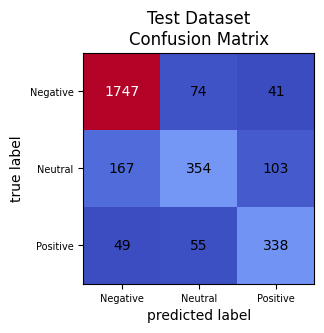

In [ ]:
predictions = cnb.predict(X_vect.transform(x_test).toarray())
test_accuracy = accuracy_score(y_test, predictions)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print('The Test set Accuracy for the CNB model is: ', round(test_accuracy,2))
cm=confusion_matrix(y_test, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(3,3), hide_ticks=True, cmap='coolwarm')
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=7,color='black')
plt.yticks(range(3), ['Negative','Neutral', 'Positive'], fontsize=7)
plt.title('Test Dataset\nConfusion Matrix')

Random Forest Model

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[[1861    0    1]
 [  34  488  102]
 [  14   90  338]]
              precision    recall  f1-score   support

    negative       0.97      1.00      0.99      1862
     neutral       0.84      0.78      0.81       624
    positive       0.77      0.76      0.77       442

    accuracy                           0.92      2928
   macro avg       0.86      0.85      0.85      2928
weighted avg       0.92      0.92      0.92      2928

The Test set Accuracy for the Random Forest model is:  0.92


Text(0.5, 1.0, 'Test Dataset\nConfusion Matrix')

<Figure size 640x480 with 0 Axes>

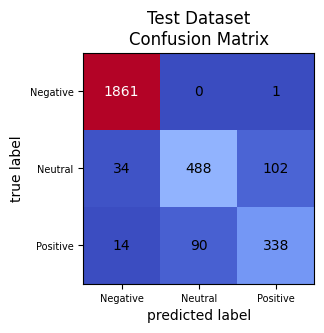

In [ ]:
predictions = Rf.predict(X_vect.transform(x_test).toarray())
test_accuracy = accuracy_score(y_test, predictions)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print('The Test set Accuracy for the Random Forest model is: ', round(test_accuracy,2))
cm=confusion_matrix(y_test, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(3,3), hide_ticks=True, cmap='coolwarm')
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=7,color='black')
plt.yticks(range(3), ['Negative','Neutral', 'Positive'], fontsize=7)
plt.title('Test Dataset\nConfusion Matrix')

Logistic Regression Model

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


[[1828   22   12]
 [  28  506   90]
 [  16   92  334]]
              precision    recall  f1-score   support

    negative       0.98      0.98      0.98      1862
     neutral       0.82      0.81      0.81       624
    positive       0.77      0.76      0.76       442

    accuracy                           0.91      2928
   macro avg       0.85      0.85      0.85      2928
weighted avg       0.91      0.91      0.91      2928

The Test set Accuracy for the Logistic Regression model is:  0.91


Text(0.5, 1.0, 'Test Dataset\nConfusion Matrix')

<Figure size 640x480 with 0 Axes>

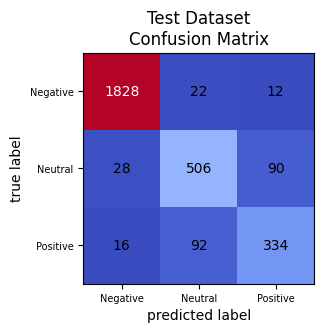

In [ ]:
predictions = lr.predict(X_vect.transform(x_test).toarray())
test_accuracy = accuracy_score(y_test, predictions)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print('The Test set Accuracy for the Logistic Regression model is: ', round(test_accuracy,2))
cm=confusion_matrix(y_test, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(3,3), hide_ticks=True, cmap='coolwarm')
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=7,color='black')
plt.yticks(range(3), ['Negative','Neutral', 'Positive'], fontsize=7)
plt.title('Test Dataset\nConfusion Matrix')

SVM Model

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


[[1855    3    4]
 [  31  496   97]
 [  15   95  332]]
              precision    recall  f1-score   support

    negative       0.98      1.00      0.99      1862
     neutral       0.84      0.79      0.81       624
    positive       0.77      0.75      0.76       442

    accuracy                           0.92      2928
   macro avg       0.86      0.85      0.85      2928
weighted avg       0.91      0.92      0.92      2928

The Test set Accuracy for the SVM model is:  0.92


Text(0.5, 1.0, 'Test Dataset\nConfusion Matrix')

<Figure size 640x480 with 0 Axes>

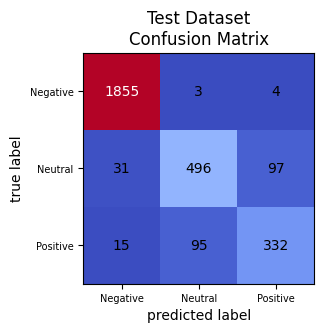

In [ ]:
predictions = svm.predict(X_vect.transform(x_test).toarray())
test_accuracy = accuracy_score(y_test, predictions)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print('The Test set Accuracy for the SVM model is: ', round(test_accuracy,2))
cm=confusion_matrix(y_test, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(3,3), hide_ticks=True, cmap='coolwarm')
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=7,color='black')
plt.yticks(range(3), ['Negative','Neutral', 'Positive'], fontsize=7)
plt.title('Test Dataset\nConfusion Matrix')